# COVID HOSPITALIZATION CASE
## The US is once again seeing a rise in COVID cases, hospitalization and death. This time last year, hospitals were flooded and overwhelmed with COVID cases, as a result, facilities were understaffed, staff were overworked and there is a shortage of key equipments. Data science can assist hospitals in estimating COVID hospitalization rate which allows for advanced preparation of resources and manpower to handle the volume of expected patients. The object of this exercise is to build a model that can make predictions/forecast on COVID daily admit cases in the USA. Steps that would be considered are:
## 1. Load Datasets. 
## 2. Data Cleaning and Wrangling - To format, arrange and select data for subsequently use.
## 3. Data Visualization - Visualize the time series data to look at patterns and watch for outliers.
## 4. Data Smoothing - Moving Averages - to reduce the noise in the dataset by looking at the average values in the dataset.
## 6. Modelling used to predict future value
## a. <i>Auto-Arima<i> 
### I. Test / Train
### II. Train with Entire Model to Forecast
## b. <i>Facebook Prophet<i>
## 7. Validation with actual report cases.
_ _ _ _ _

## 1. Load Datasets

In [533]:
#Calling Directory
import pandas as pd
import os
MYDIR=os.getcwd()
print(MYDIR)

/Users/lilybug


In [534]:
#Reading CSV file
path=MYDIR+"/Downloads/current-covid-patients-hospital.csv"
df=pd.read_csv(path)
df

,Entity,Code,Day,Daily hospital occupancy
0,Austria,AUT,2020-04-01,856
1,Austria,AUT,2020-04-02,823
2,Austria,AUT,2020-04-03,829
3,Austria,AUT,2020-04-04,826
4,Austria,AUT,2020-04-05,712
...,...,...,...,...
12731,United States,USA,2021-07-06,13956
12732,United States,USA,2021-07-07,14632
12733,United States,USA,2021-07-08,15006
12734,United States,USA,2021-07-09,15290


_ _ _ _ 

## 2. Data Cleaning and Wrangling 
### (1)Filter to consider only the USA, (2)Change day to datetime format

In [535]:
#Filtering Data to highlight USA (.isin) information only, reset index and drop index and Entity column
df_reset= df[df["Entity"].isin(["United States"])].reset_index().drop(['index', 'Entity'], axis=1)
#Rename Column Titles
df_rename=df_reset.rename({'Code':'Country','Daily hospital occupancy':'Daily_Admits'}, axis=1)
#Rearrange Column
df_USA=df_rename[['Day','Country','Daily_Admits']]
#Change Date to Dateformat
df_USA['Day']=pd.to_datetime(df_USA['Day'])
df_USA.head(10)

,Day,Country,Daily_Admits
0,2020-07-15,USA,33753
1,2020-07-16,USA,38549
2,2020-07-17,USA,40078
3,2020-07-18,USA,40409
4,2020-07-19,USA,37910
5,2020-07-20,USA,41152
6,2020-07-21,USA,42205
7,2020-07-22,USA,46156
8,2020-07-23,USA,47622
9,2020-07-24,USA,46786


In [536]:
#Range of the Dataset
df_reset.shape

(361, 3)

In [537]:
df_USA.dtypes

Day             datetime64[ns]
Country                 object
Daily_Admits             int64
dtype: object

********

## 3. Data Visualization

In [538]:
#SCATTERPLOT - Insert Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

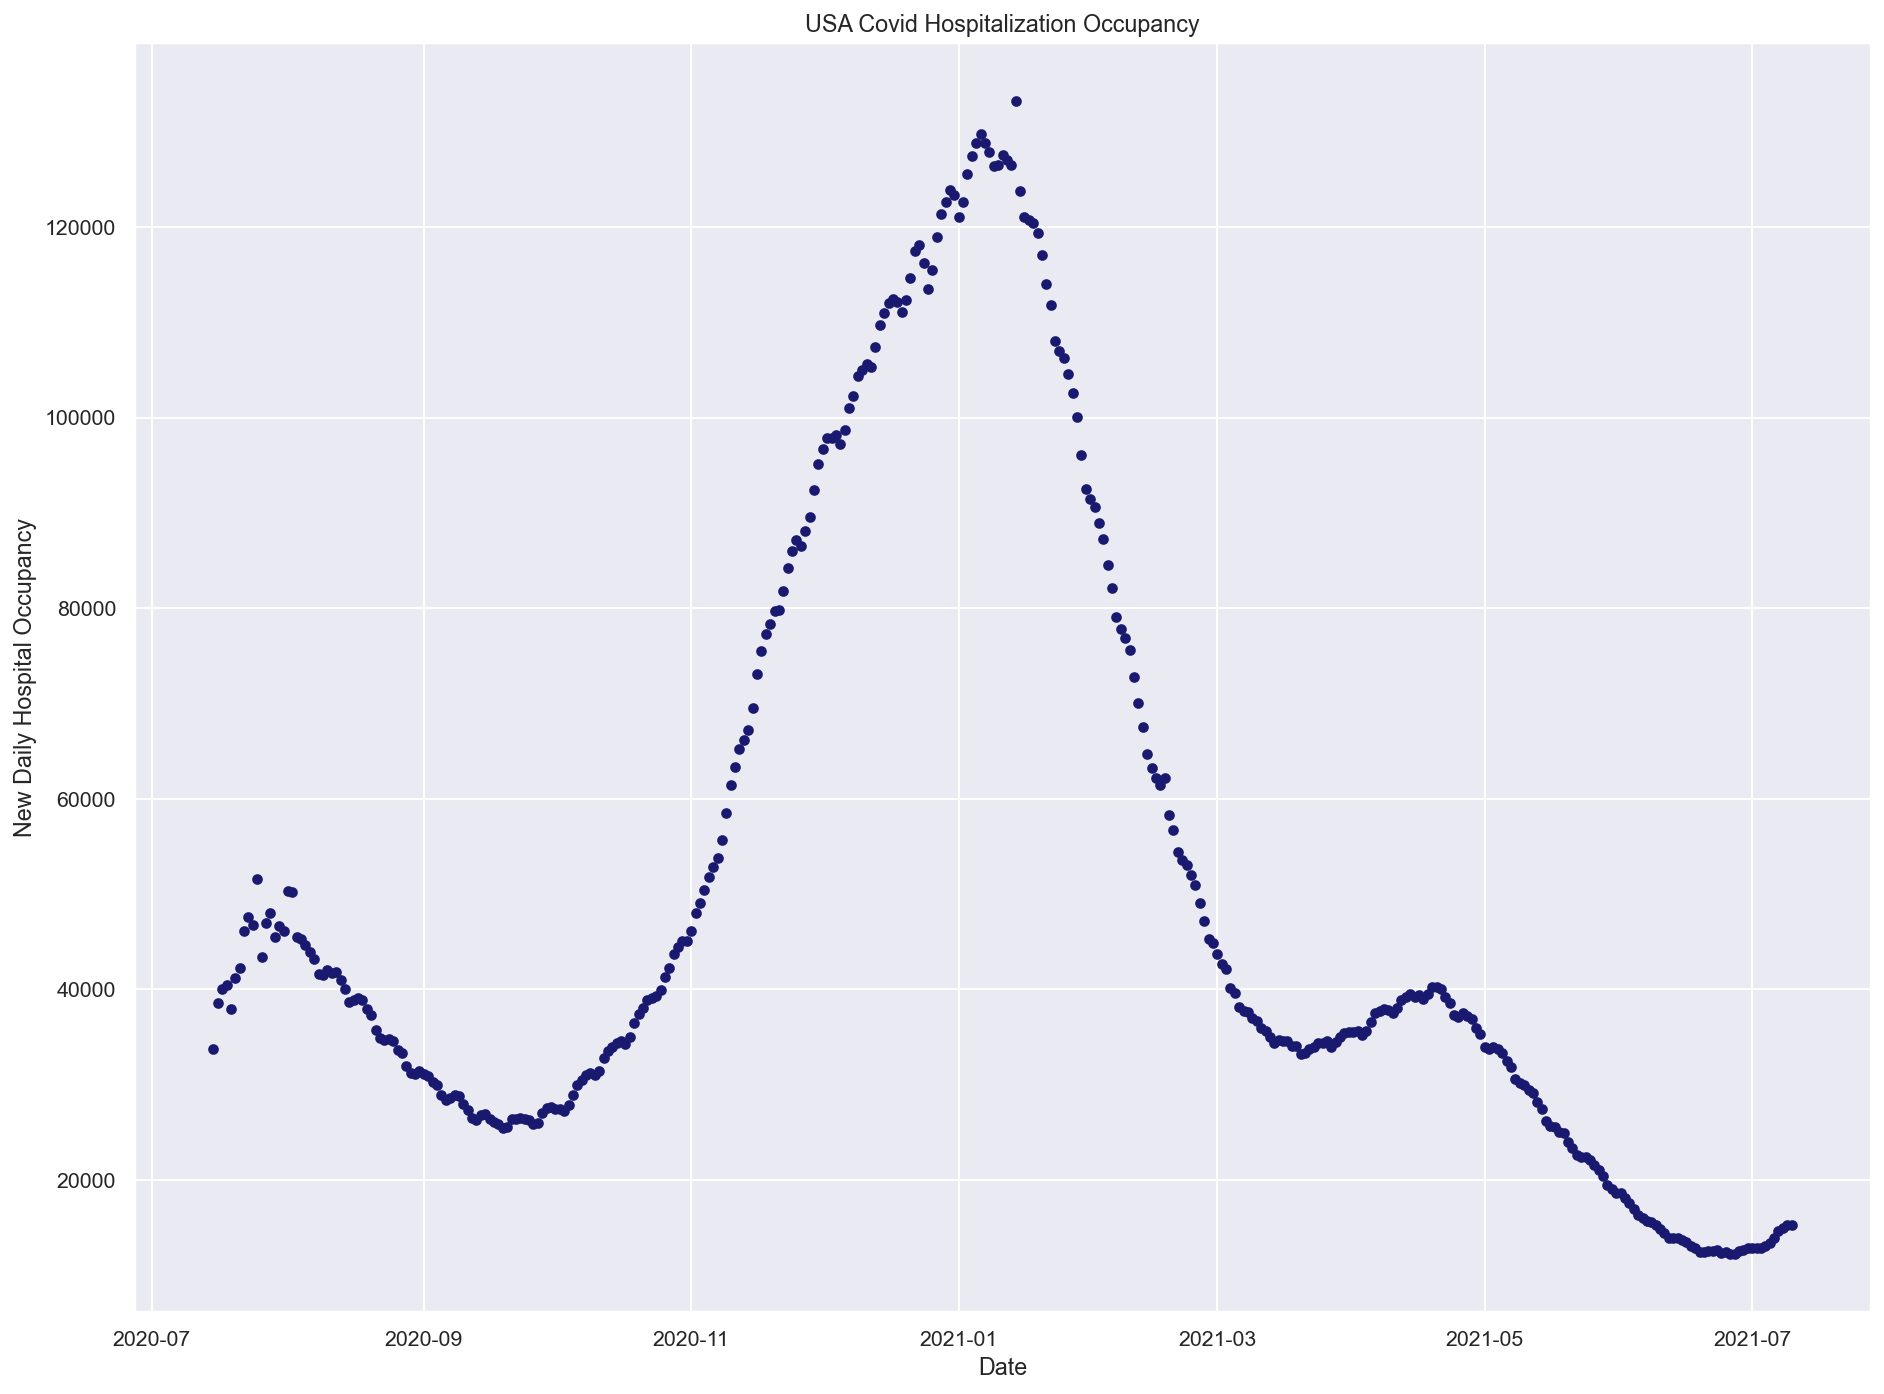

In [539]:
df_USA.plot(kind='scatter', x='Day', y='Daily_Admits', color='midnightblue')
plt.title('USA Covid Hospitalization Occupancy')
plt.ylabel('New Daily Hospital Occupancy')
plt.xlabel('Date')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

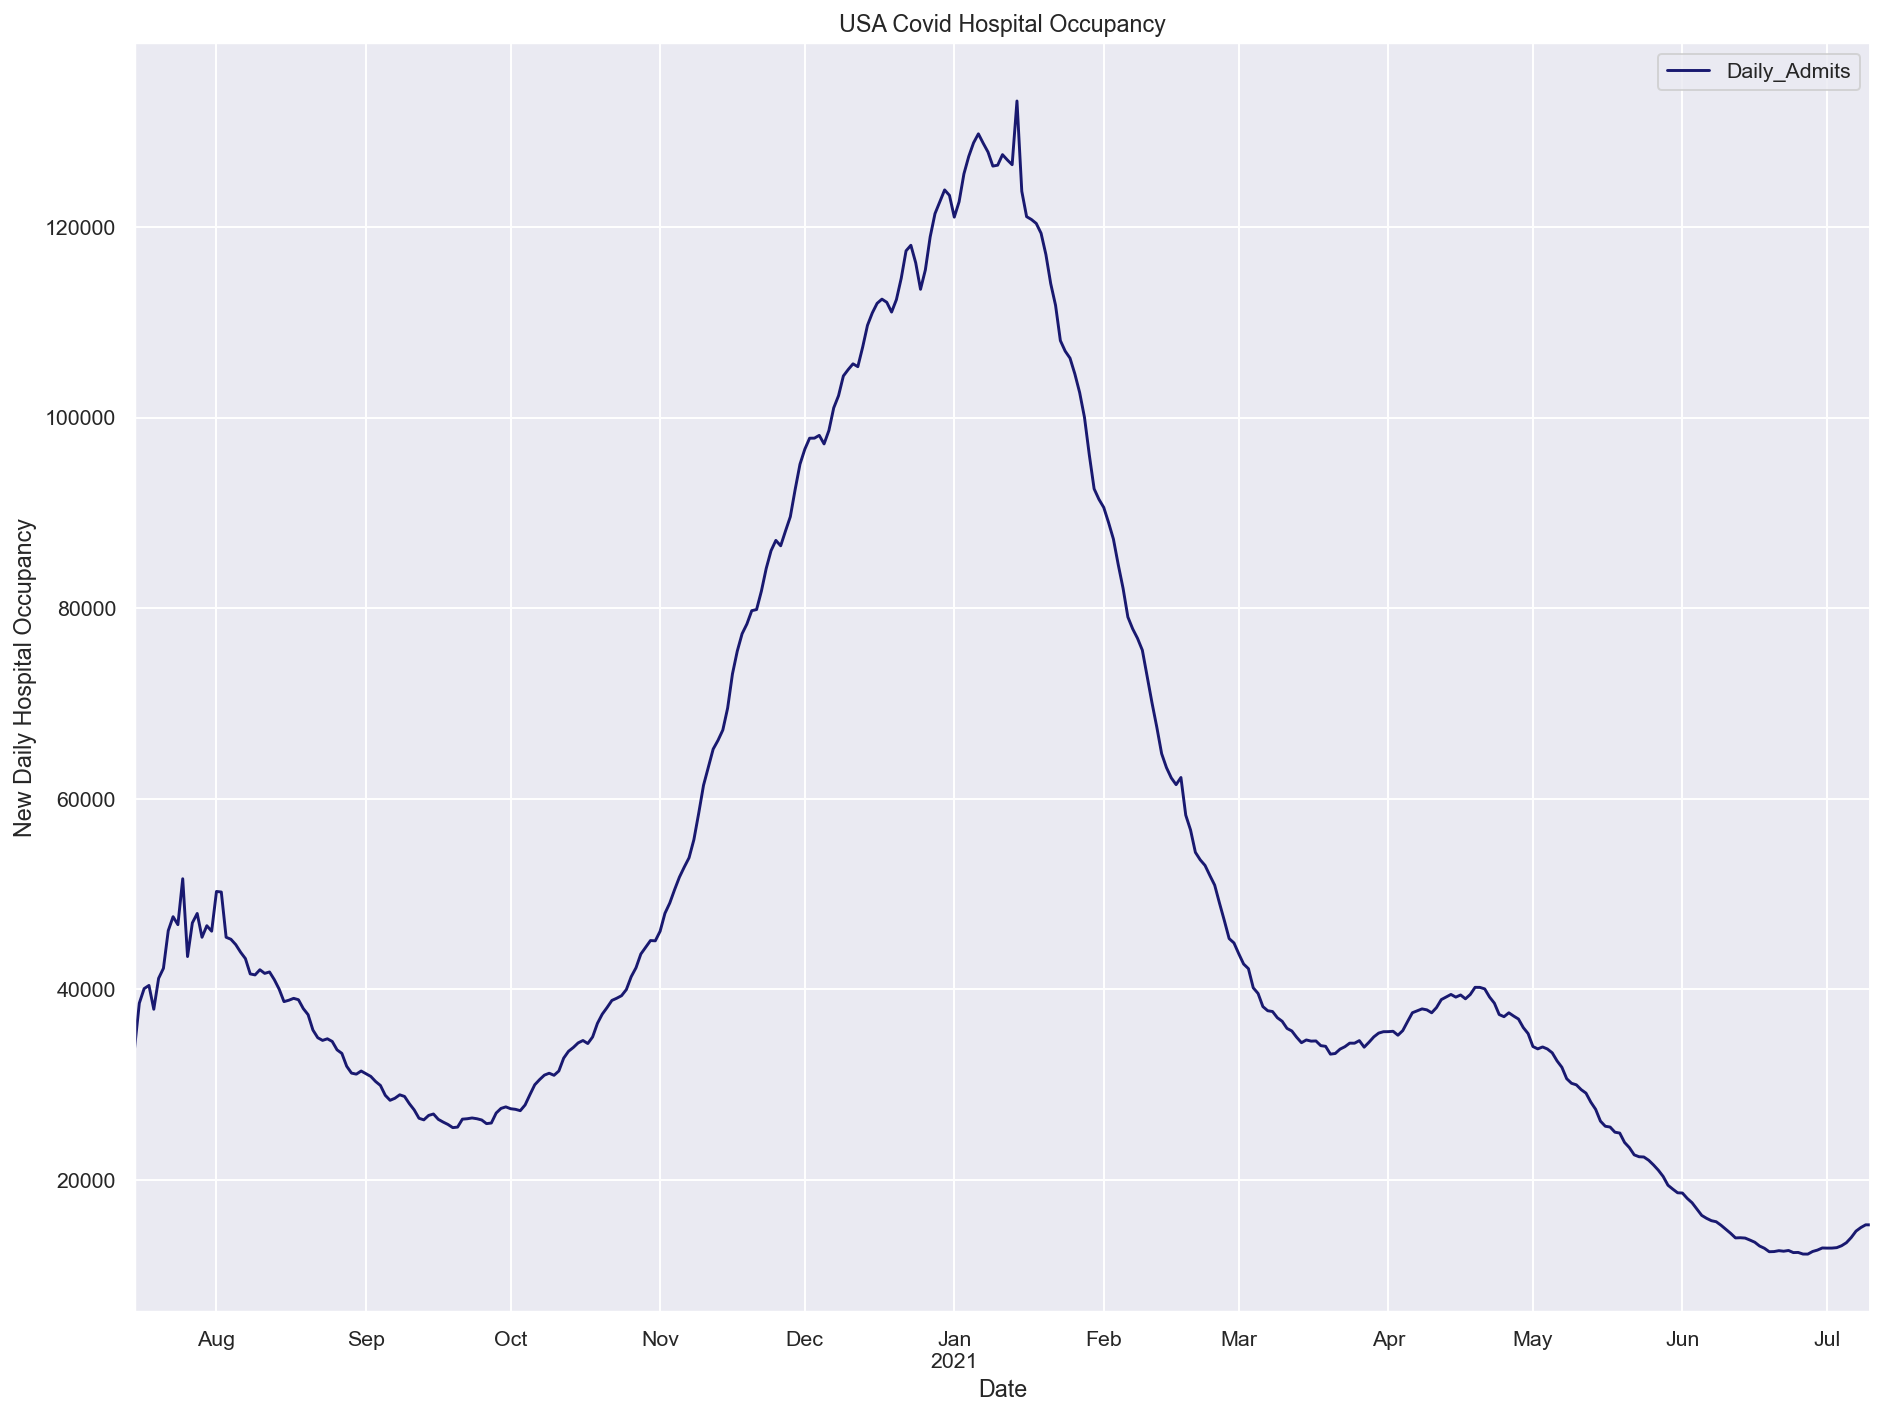

In [540]:
#Line Plot
df_USA.plot(kind='line', x='Day', y='Daily_Admits', color='midnightblue')
plt.title('USA Covid Hospital Occupancy')
plt.ylabel('New Daily Hospital Occupancy')
plt.xlabel('Date')
plt.show

In [541]:
#extract features from Day Column such as - year, month, day, hour, and minute
df_USA1=df_USA
df_USA1['Month'] = df_USA1['Day'].dt.strftime('%B')
df_USA1.head(2)

,Day,Country,Daily_Admits,Month
0,2020-07-15,USA,33753,July
1,2020-07-16,USA,38549,July


<function matplotlib.pyplot.show(close=None, block=None)>

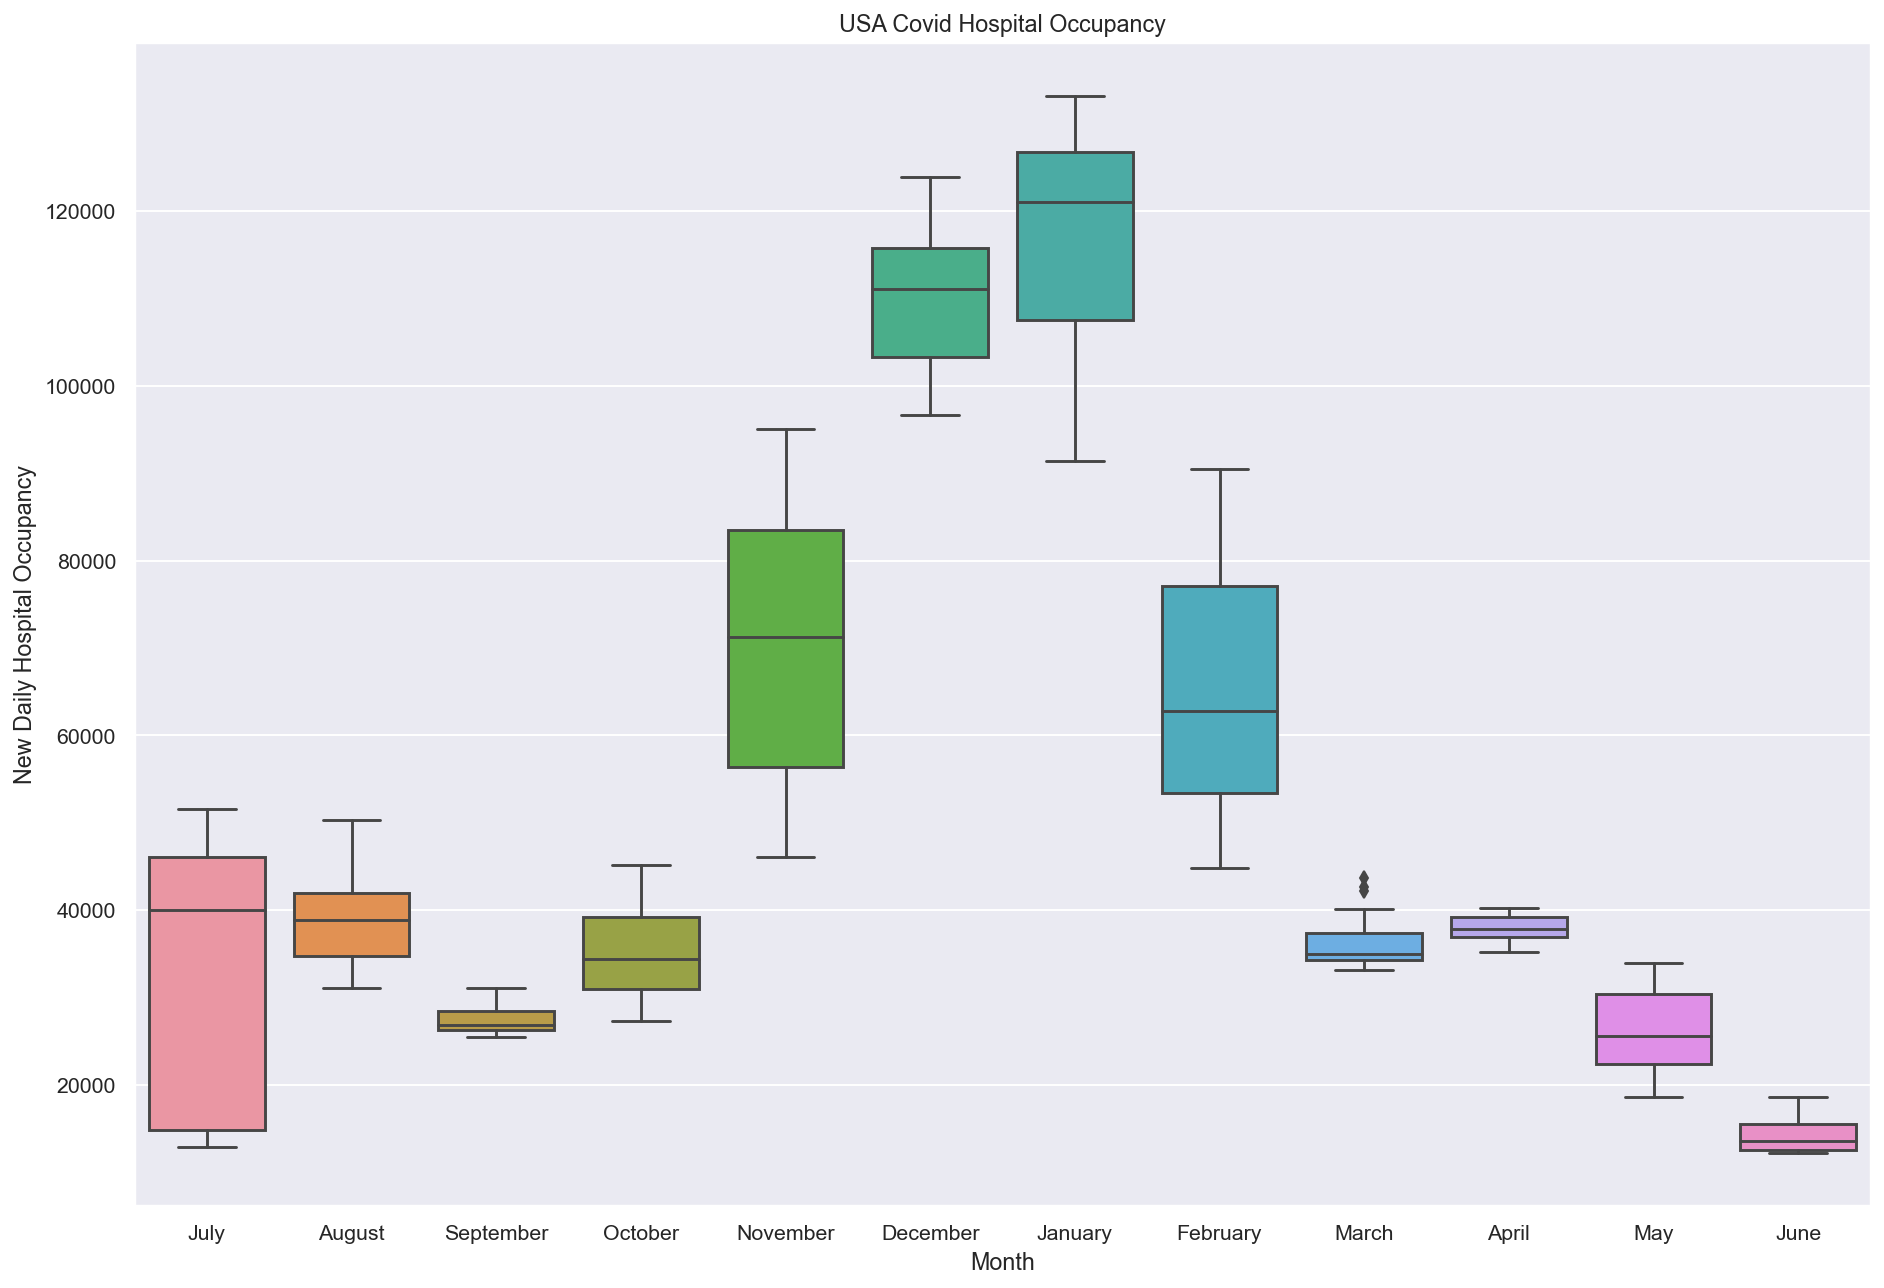

In [542]:
#Box Plots show outliers
import seaborn as sns
sns.set(rc={'figure.figsize':(16,11)})
M=df_USA['Month']
DA=df_USA['Daily_Admits']
ax=sns.boxplot(x=M,y=DA).set(title='USA Covid Hospital Occupancy')
plt.ylabel('New Daily Hospital Occupancy')
plt.show

#### Scatter plot shows that the trend appears to be smooth (no oscillations) apart from a few outliers. Box plot show some outliers.  

- - - - - 
## 4. Moving Averages - Data Smoothing
##### Moving average can smooth out the noise of random outliers and emphasize long-term trends

In [543]:
#Considering a 7 day rolling window (looking at the weekly instead of daily admits)
df_USA['Day_7RW']=df_USA.iloc[:,2].rolling(window=7).mean()
df_USA.head(10)

,Day,Country,Daily_Admits,Month,Day_7RW
0,2020-07-15,USA,33753,July,NaN
1,2020-07-16,USA,38549,July,NaN
2,2020-07-17,USA,40078,July,NaN
3,2020-07-18,USA,40409,July,NaN
4,2020-07-19,USA,37910,July,NaN
5,2020-07-20,USA,41152,July,NaN
6,2020-07-21,USA,42205,July,39150.857143
7,2020-07-22,USA,46156,July,40922.714286
8,2020-07-23,USA,47622,July,42218.857143
9,2020-07-24,USA,46786,July,43177.142857


<function matplotlib.pyplot.show(close=None, block=None)>

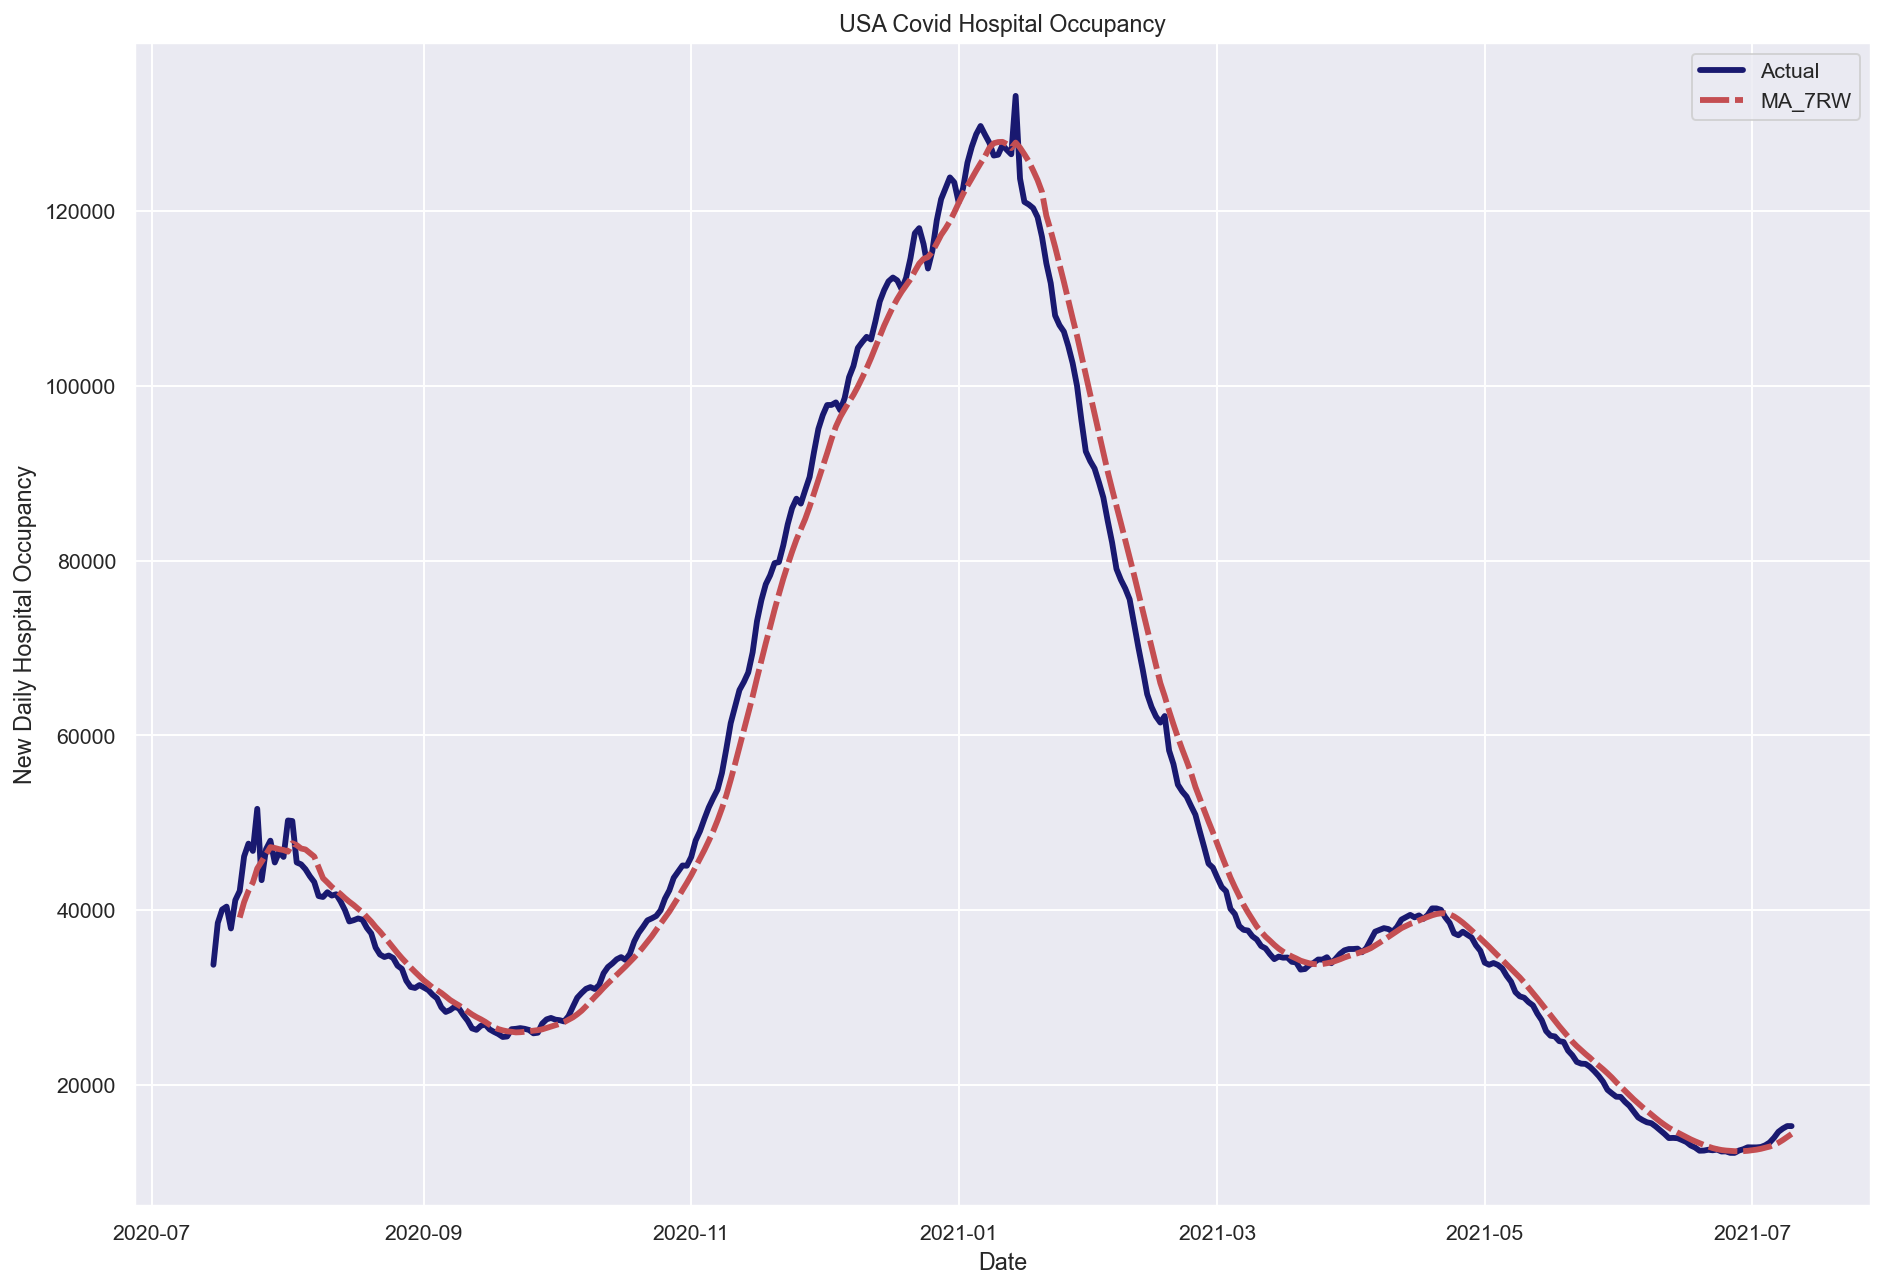

In [544]:
#Line Plot
x1=df_USA['Day']
y1=df_USA['Daily_Admits']
y2=df_USA['Day_7RW']
plt.plot(x1, y1, label = "Actual", color='midnightblue',linewidth=3)
plt.plot(x1, y2, label = "MA_7RW", linestyle=(0,(5,1)), color='r',linewidth=3)
plt.title('USA Covid Hospital Occupancy')
plt.ylabel('New Daily Hospital Occupancy')
plt.xlabel('Date')
plt.legend()
plt.show

###### Now before we perform Auto_Arima we have to modify to dataset to reflect a univariate data by:
##### a.Setting the 'Day' column as the index column
###### b. Removing Country, Day_7RW, Months columns

In [545]:
# Removing Country, Daily_Admits, Months columns
df_USA_drop=df_USA.drop(['Country', 'Day_7RW', 'Month'], axis=1)

In [546]:
#Setting the 'Day' column as the index column
df_USA_final=df_USA_drop.set_index('Day')
df_USA_final.head(10)

,Daily_Admits
Day,
2020-07-15,33753
2020-07-16,38549
2020-07-17,40078
2020-07-18,40409
2020-07-19,37910
2020-07-20,41152
2020-07-21,42205
2020-07-22,46156
2020-07-23,47622



_ _ _ _ _
## 5. Forecasting Models


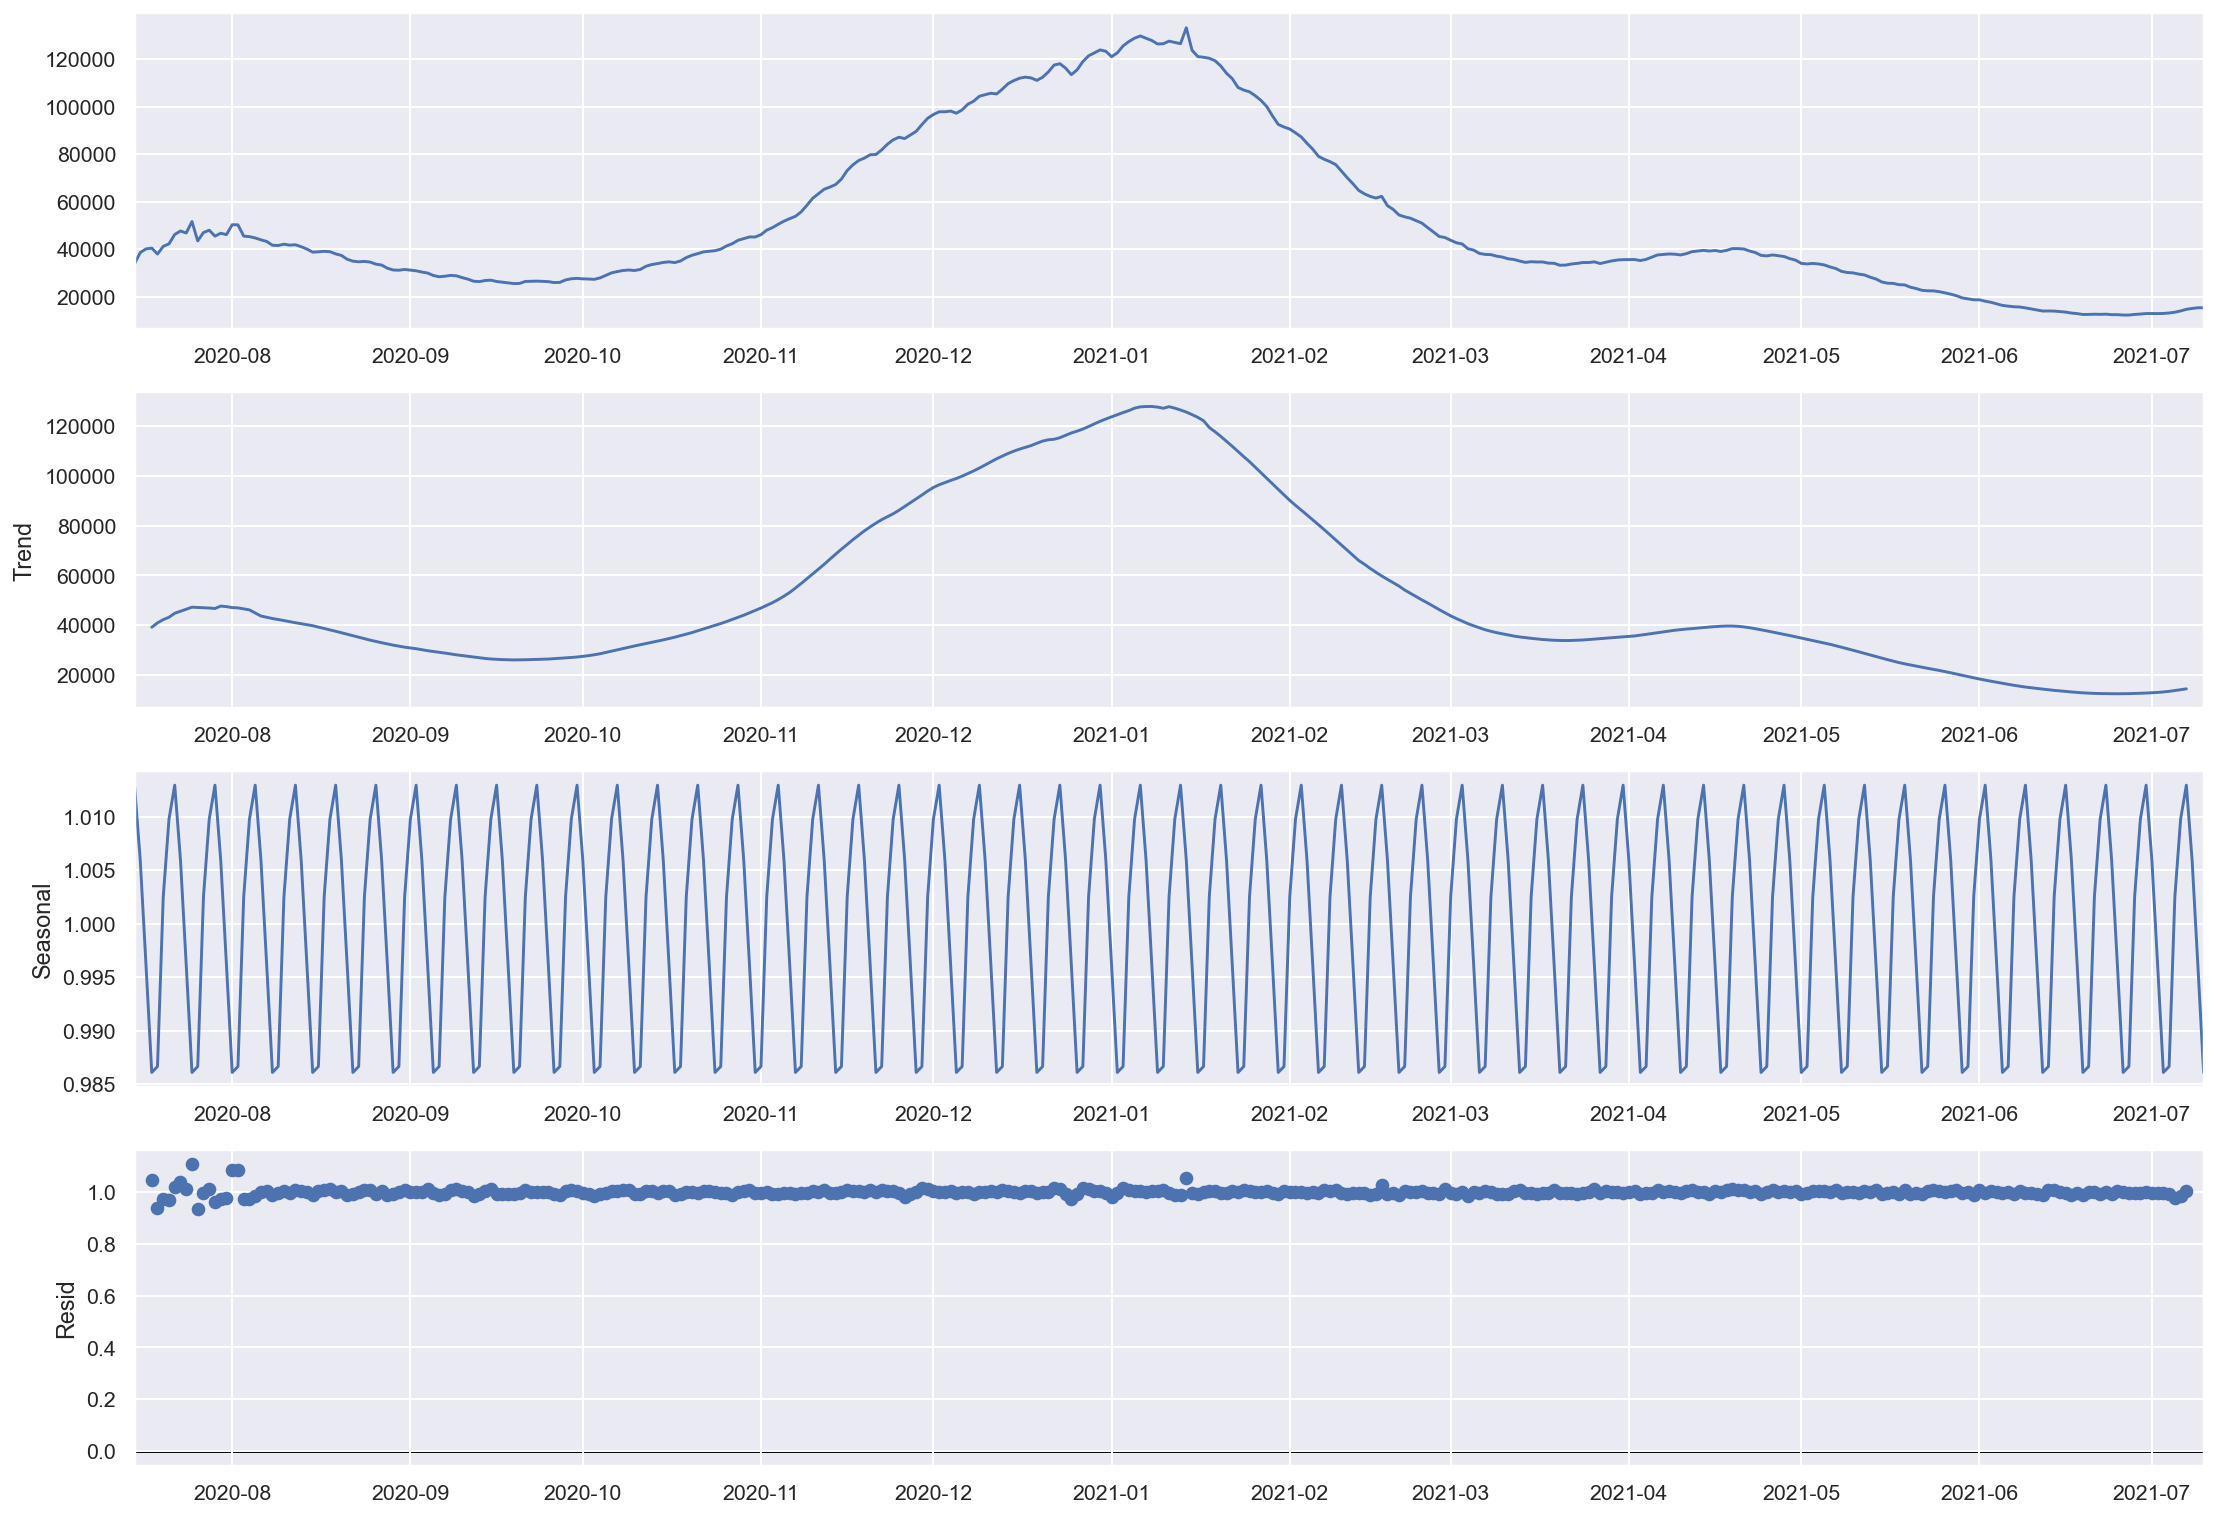

In [547]:

#use the seasonal_decompose() in statsmodels to decompose in one line of code
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_USA_final, model='multiplicative')
result.plot()
plt.show()

###### From the plot above we can clearly see there is seasonal component (which would not yield high autocorrelation) of the data, and we can also see the non-linear trend of the data. 

##### Differencing will be done below to make it stationary

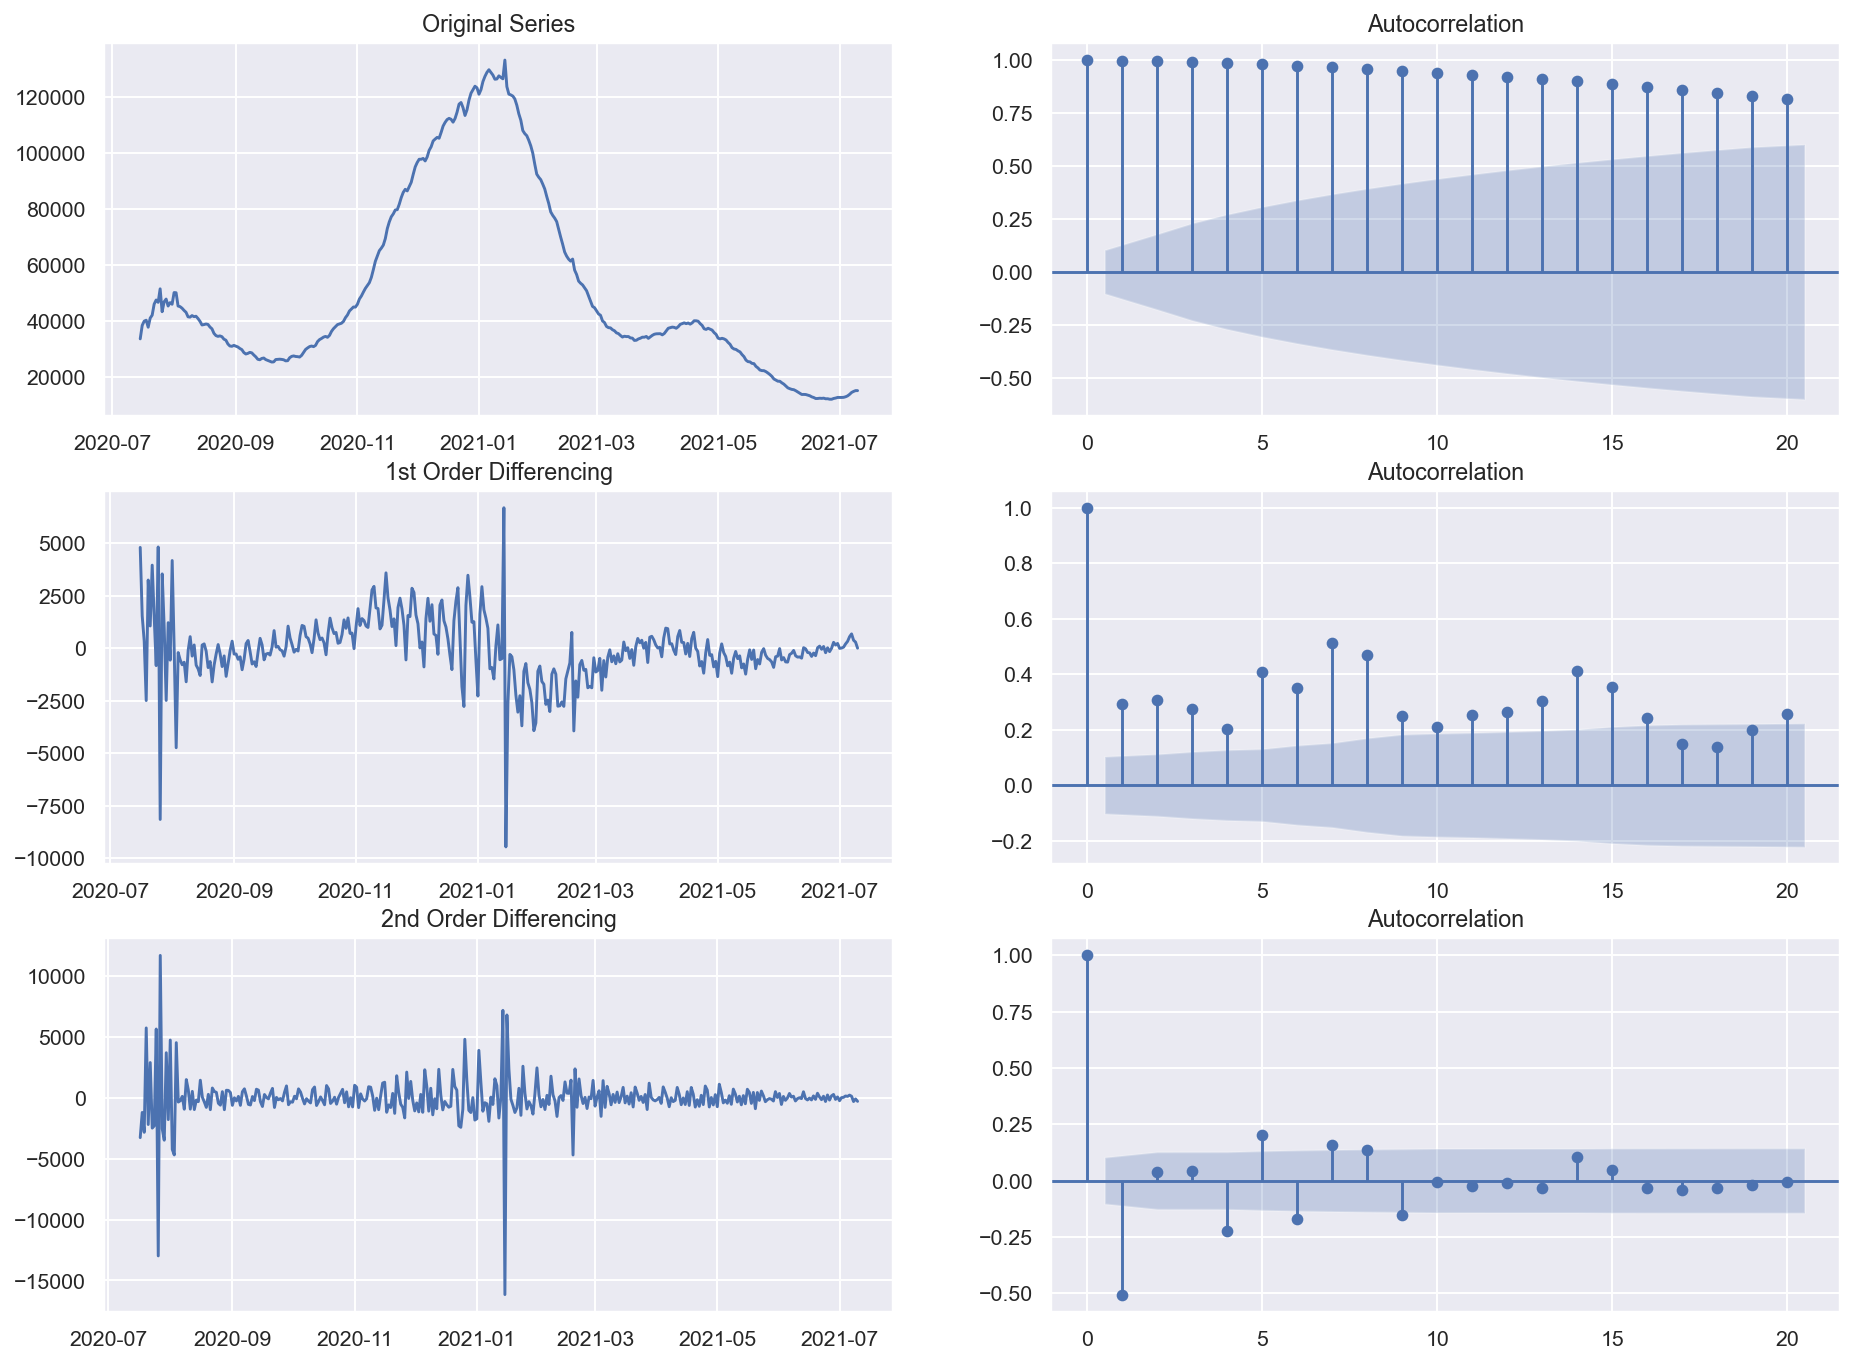

In [548]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,12), 'figure.dpi':140})

# Original Series
fig , axes = plt.subplots(3, 2) 
# you can sharex or sharey (sharing x or y axis) fig , axes = plt.subplots(3,2,sharex=True)
axes[0, 0].plot(df_USA_final); axes[0, 0].set_title('Original Series')
plot_acf(df_USA_final, ax=axes[0, 1],lags=20)

# 1st Differencing - Automatic differencing
axes[1, 0].plot(df_USA_final.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_USA_final.diff().dropna(), ax=axes[1, 1],lags=20)

# 2nd Differencing  - Automatic differencing
axes[2, 0].plot(df_USA_final.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_USA_final.diff().diff().dropna(),ax=axes[2, 1],lags=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axes.flat:
#     ax.label_outer()

plt.show()

###### For the above series, the time series reaches stationarity with one order of differencing, so, tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity) . Further confirmation is taken by performing some statistical tests which gives the order of differencing required to make a series stationary.

In [554]:
from pmdarima.arima.utils import ndiffs
## Adf Test
y = df_USA_final
ndiffs(y, test='adf')  

# KPSS test
ndiffs(y, test='kpss') 

# PP test:
ndiffs(y, test='pp') 

1

-----

## a.Auto Arima
### I. Train / Test Set

In [555]:
from pmdarima import auto_arima
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
#Now that we’ve analyzed the data, we can clearly see we have a time series with a seasonal component, 
#so it make sense to use a Seasonal ARIMA model. In order to do this we will need to choose p,d,q values for the ARIMA
#, and P,D,Q values for the Seasonal component.        
Arima_model = auto_arima(df_USA_final, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=7, #   maximum p and q / frequency of series
                            test='adf', start_P=0,start_Q=0,seasonal=True,
                           d=1,D=1, trace=True, # let model determine 'd'
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)
#The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better 
#fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.
print(Arima_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=6145.320, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=6148.388, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=6130.647, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=6122.611, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=6143.351, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=6107.405, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=6105.944, Time=0.40 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=6122.480, Time=0.15 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=6107.912, Time=0.27 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=6108.718, Time=0.36 sec
 ARIMA(0,1,0)(0,1,2)[7] intercept   : AIC=6110.590, T

In [570]:
#We’ll train on 85% of the data and test our forecast on the years after that and compare it to the real data
train =df_USA_final[:int(0.85*(len(df_USA_final)))]
test =df_USA_final[int(0.85*(len(df_USA_final))):]

#We can then train the model by simply calling .fit on the  model and passing in the training data:
Arima_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 7),
      suppress_warnings=True, with_intercept=False)

In [572]:
#Now that the model has been fitted to the training data, we can forecast into the future. 
#So if we check the length of our test data and use the value for our .predict() method call:
future_forecast = Arima_model.predict(n_periods=len(test))

In [573]:
#Let’s reorganize this set of predictions by creating a dataframe that contains our future forecast and 
#then concatenating that with the original data. We can then plot this to view how well our prediction 
#forecast matched up with the test set for which we have the real data:
#future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=[‘Prediction’])
future_forecast = pd.DataFrame(future_forecast,index=test.index,columns=['Prediction'])
Combine_df_USA=pd.concat([test,future_forecast],axis=1)
Combine_df_USA.tail()

,Daily_Admits,Prediction
Day,,
2021-07-06,13956,2378.861277
2021-07-07,14632,2107.787467
2021-07-08,15006,1298.684798
2021-07-09,15290,694.362847
2021-07-10,15286,-446.940866


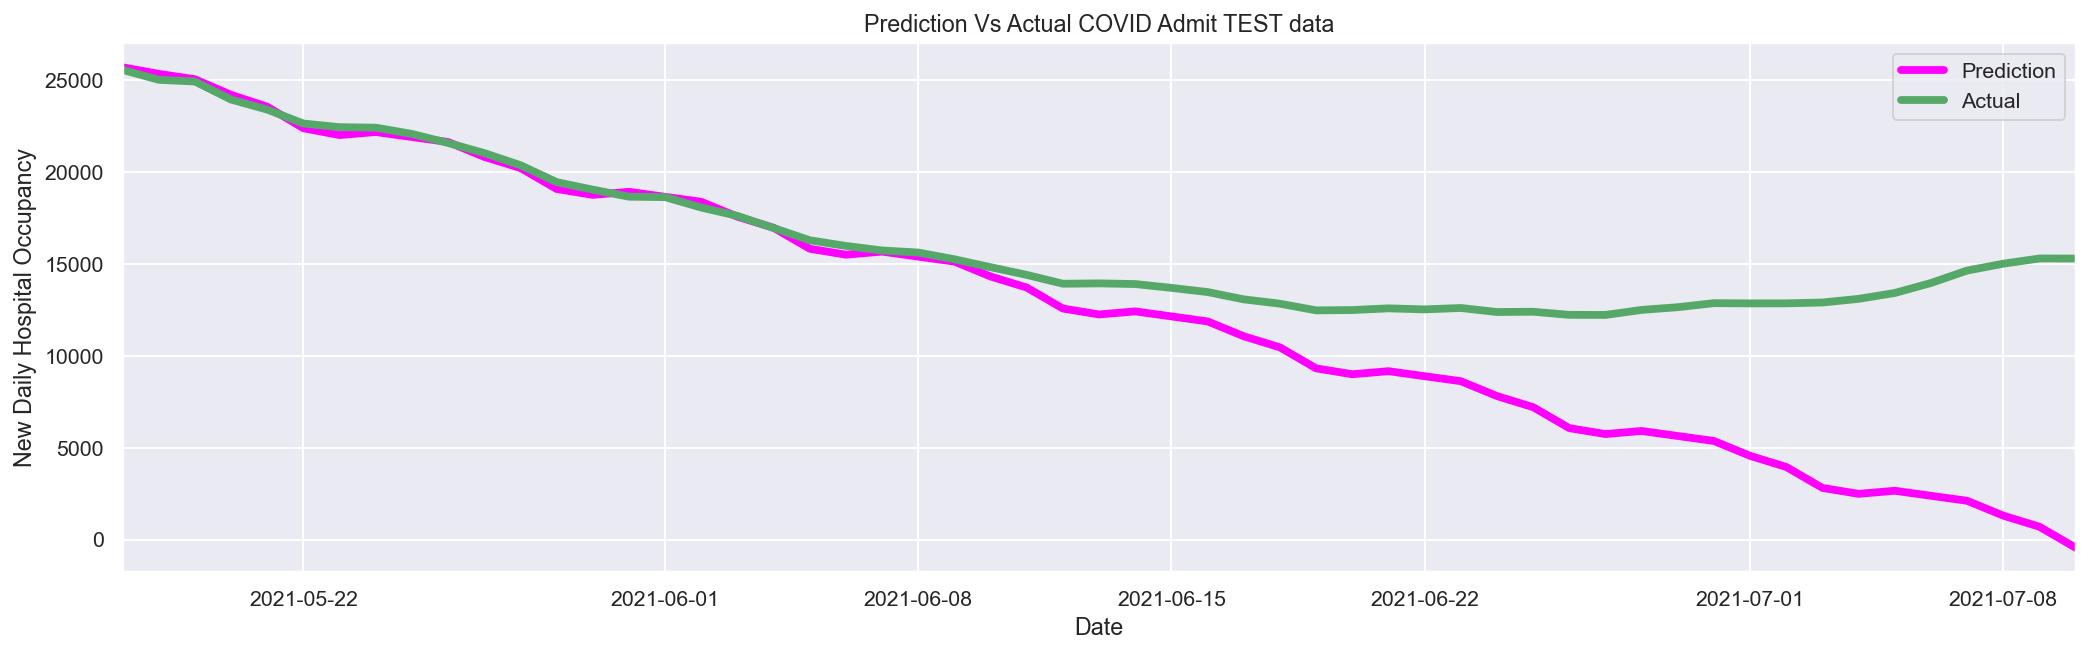

In [574]:
# plot forecast results and display RMSE

plt.figure(figsize=(18,5))
plt.plot(Combine_df_USA['Prediction'], 'fuchsia', label="Prediction",linewidth=4);
plt.plot(test,'g',label="Actual",linewidth=4);
plt.xlabel("Date")
plt.ylabel("New Daily Hospital Occupancy")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.title("Prediction Vs Actual COVID Admit TEST data")
plt.show()

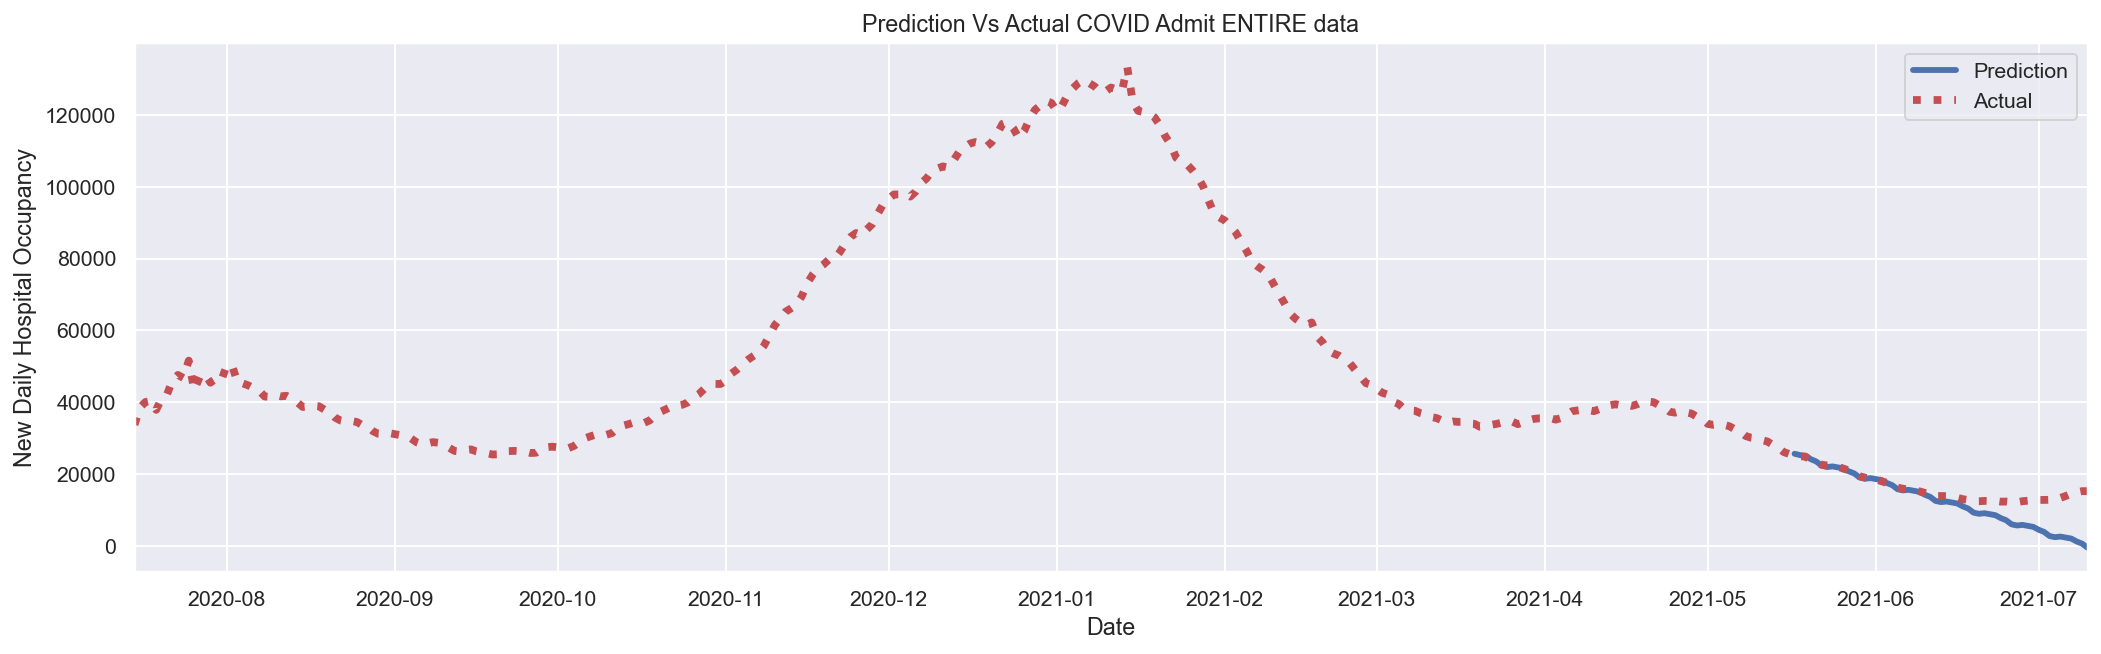

In [575]:
plt.figure(figsize=(18,5))
plt.plot(Combine_df_USA['Prediction'], 'b', label="Prediction",linewidth=3);
plt.plot(df_USA_final,'r',label="Actual", linestyle='dotted',linewidth=4);
plt.xlabel("Date")
plt.ylabel("New Daily Hospital Occupancy")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.title("Prediction Vs Actual COVID Admit ENTIRE data")
plt.show()

## Next Steps
##### Now that we’ve evaluated our data on the test set and satisfied with the performance, the next step would be to refit our model to our entire data set and then forecast into the real future.

/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Day
2020-07-15        0.0
2020-07-16    33753.0
2020-07-17    38549.0
2020-07-18    40078.0
2020-07-19    40409.0
dtype: float64


Text(0.5, 1.0, 'Plot showing Prediction, Actual and 14 day Forecast')

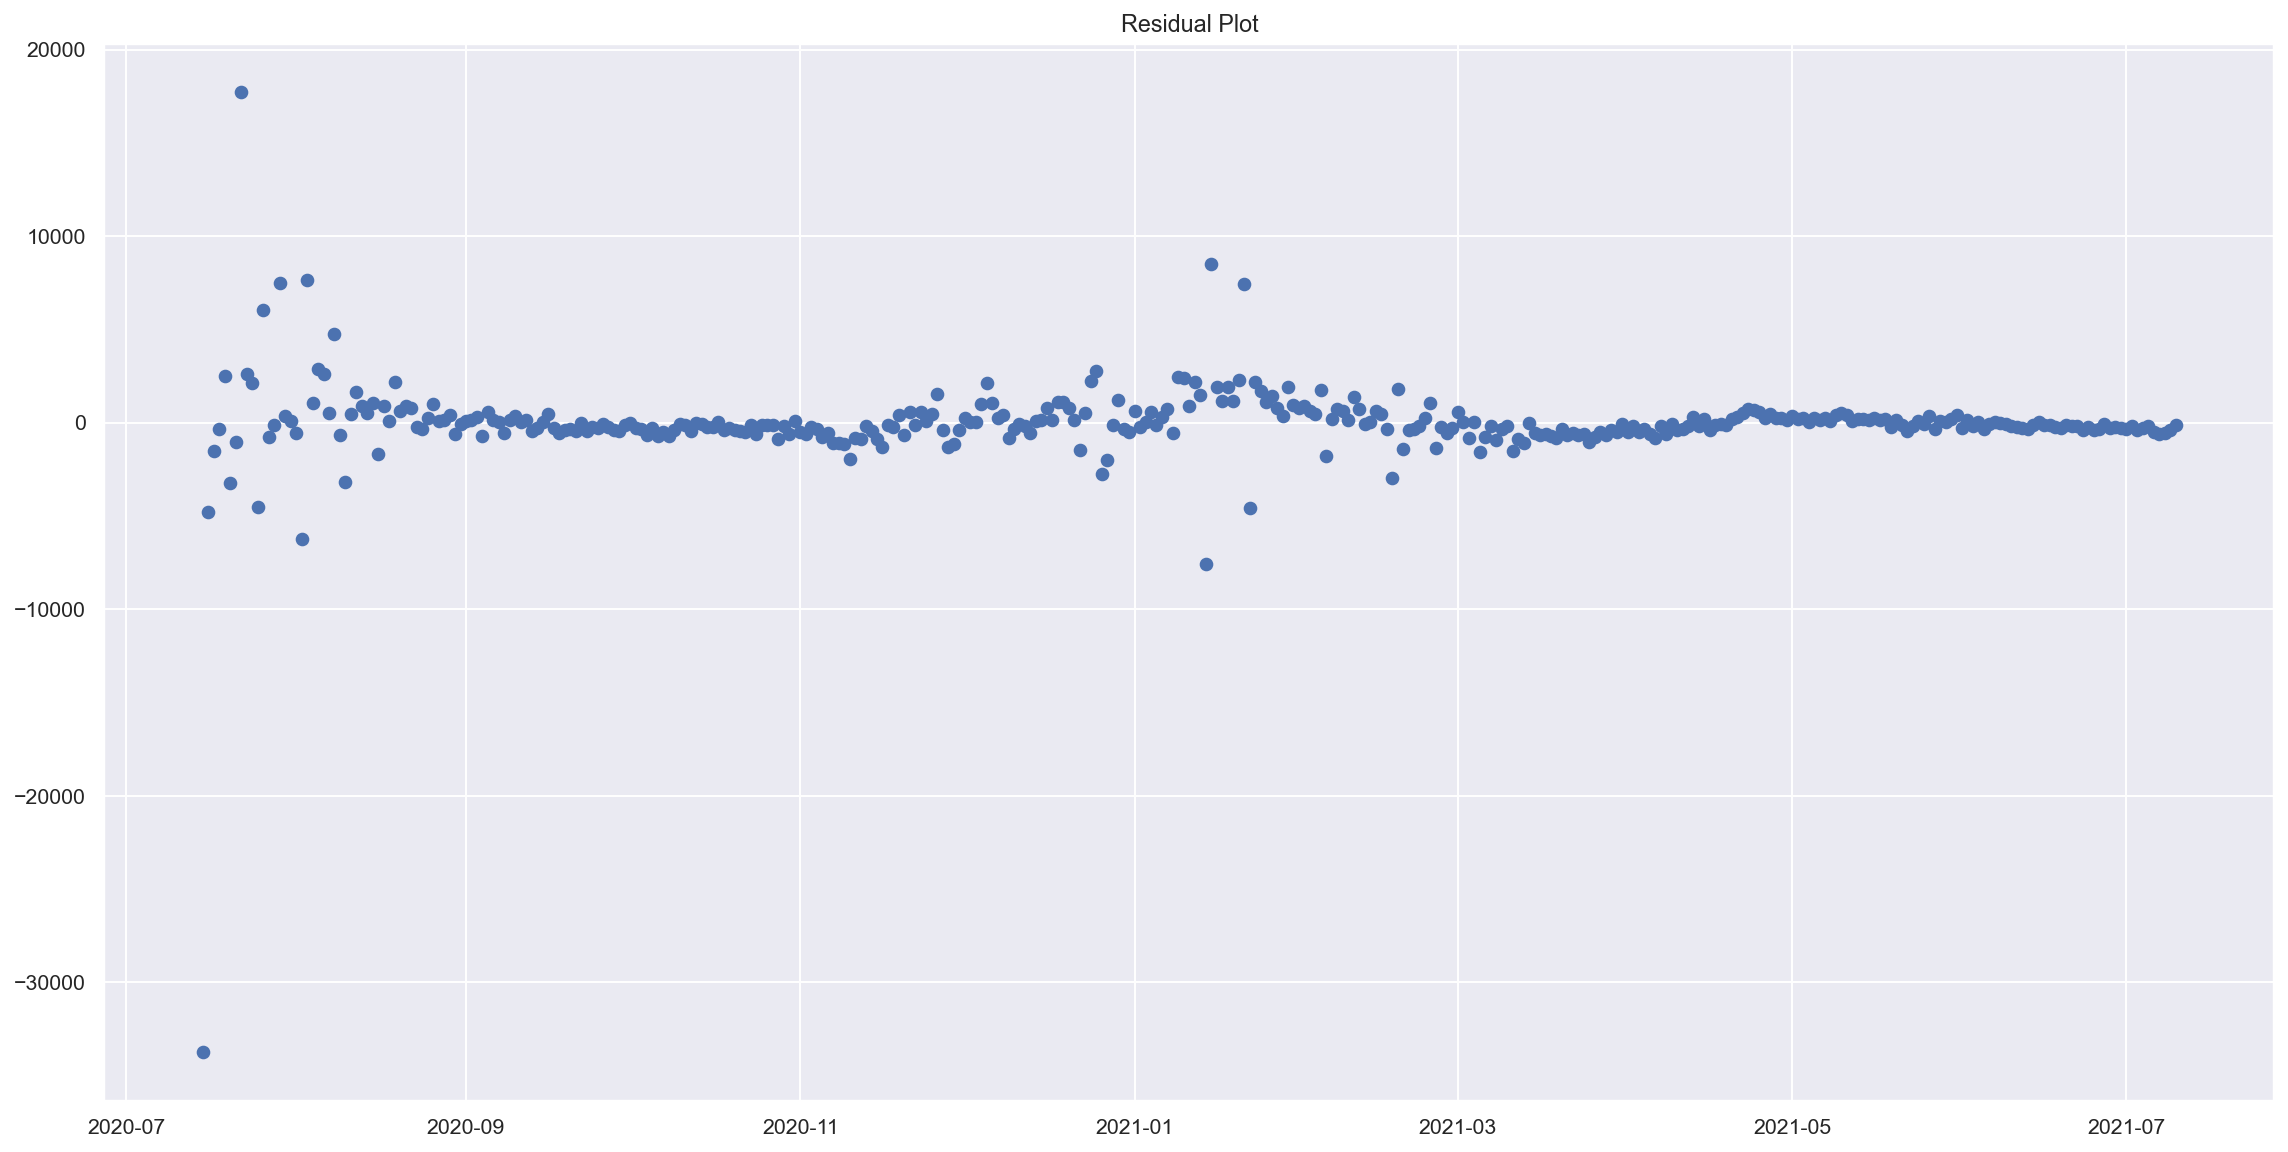

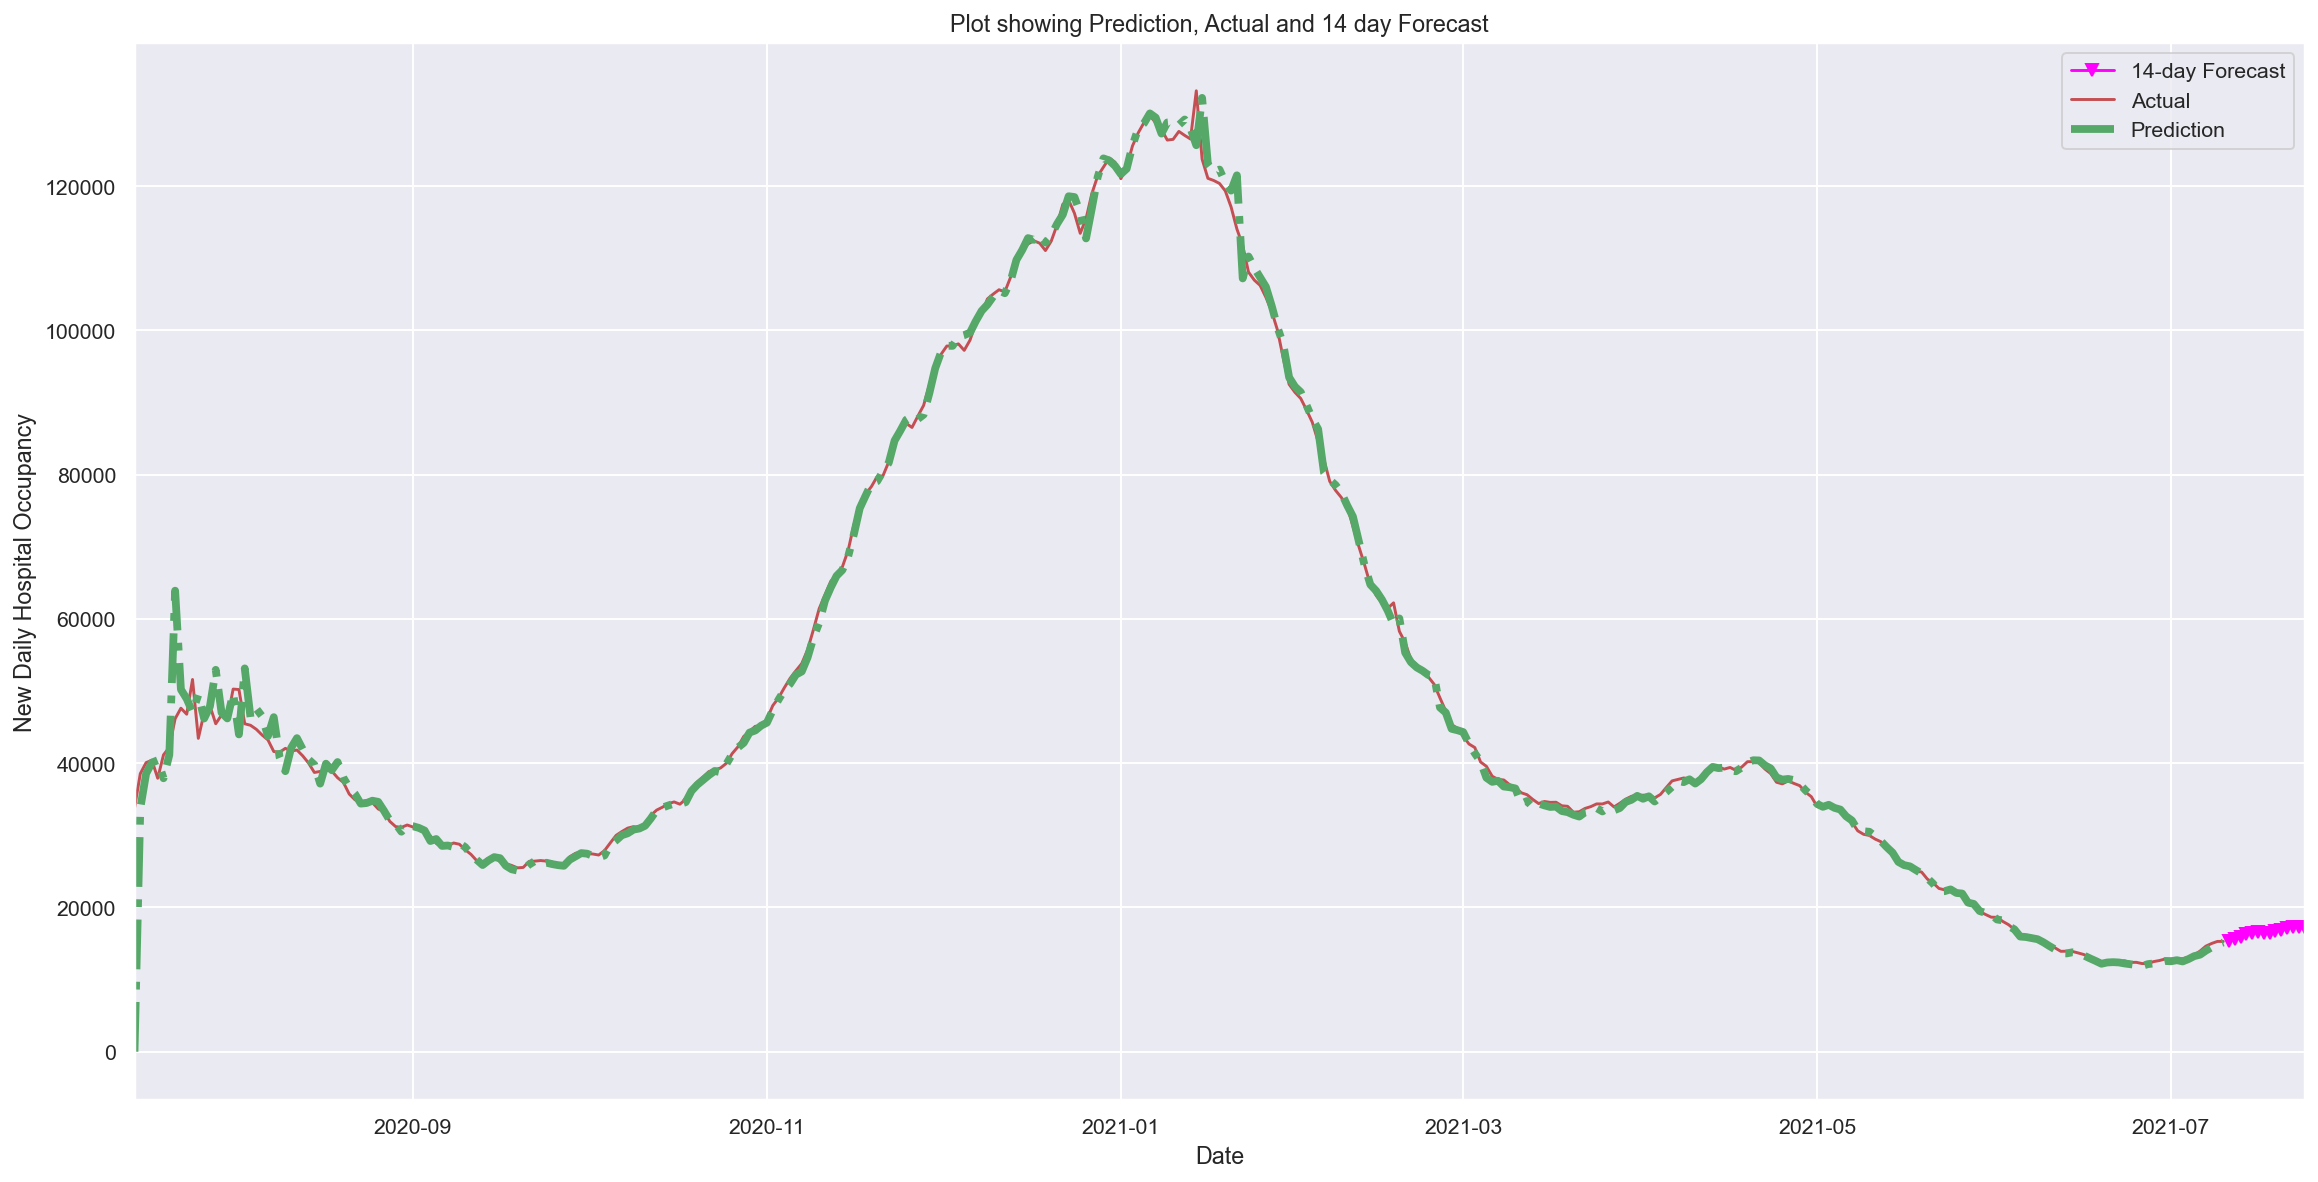

In [576]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_USA_final,order=(0, 1, 0),seasonal_order=(0, 1, 2, 7))

# Extract fitted model
model_fit=model.fit(disp=False)

# Calculate residuals on original series
prediction=pd.Series(model_fit.fittedvalues, copy=True)

print(prediction.head(5))

# Compute Residuals and check residual plot
residual=prediction-df_USA_final['Daily_Admits']
plt.figure(figsize=(20,10))
plt.plot(residual, 'o')
plt.title('Residual Plot')

# Make 14 day prediction
K=14
forecast=model_fit.forecast(K)

#print(forecast)

# plot forecast results and display RMSE

plt.figure(figsize=(20,10))
plt.plot(forecast, 'fuchsia',label="14-day Forecast",marker="v");
plt.plot(df_USA_final,'r',label="Actual");
plt.plot(prediction,'g',label="Prediction",linestyle="dashdot",linewidth=4);
plt.xlabel("Date")
plt.ylabel("New Daily Hospital Occupancy")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.title("Plot showing Prediction, Actual and 14 day Forecast")

#### ARIMA Model Summary

                             ARIMA Model Results                              
Dep. Variable:         D.Daily_Admits   No. Observations:                  360
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3148.961
Method:                           css   S.D. of innovations           1522.599
Date:                Mon, 02 Aug 2021   AIC                           6301.921
Time:                        15:08:20   BIC                           6309.693
Sample:                    07-16-2020   HQIC                          6305.012
                         - 07-10-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.2972     80.248     -0.639      0.523    -208.580     105.986


/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/lilybug/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


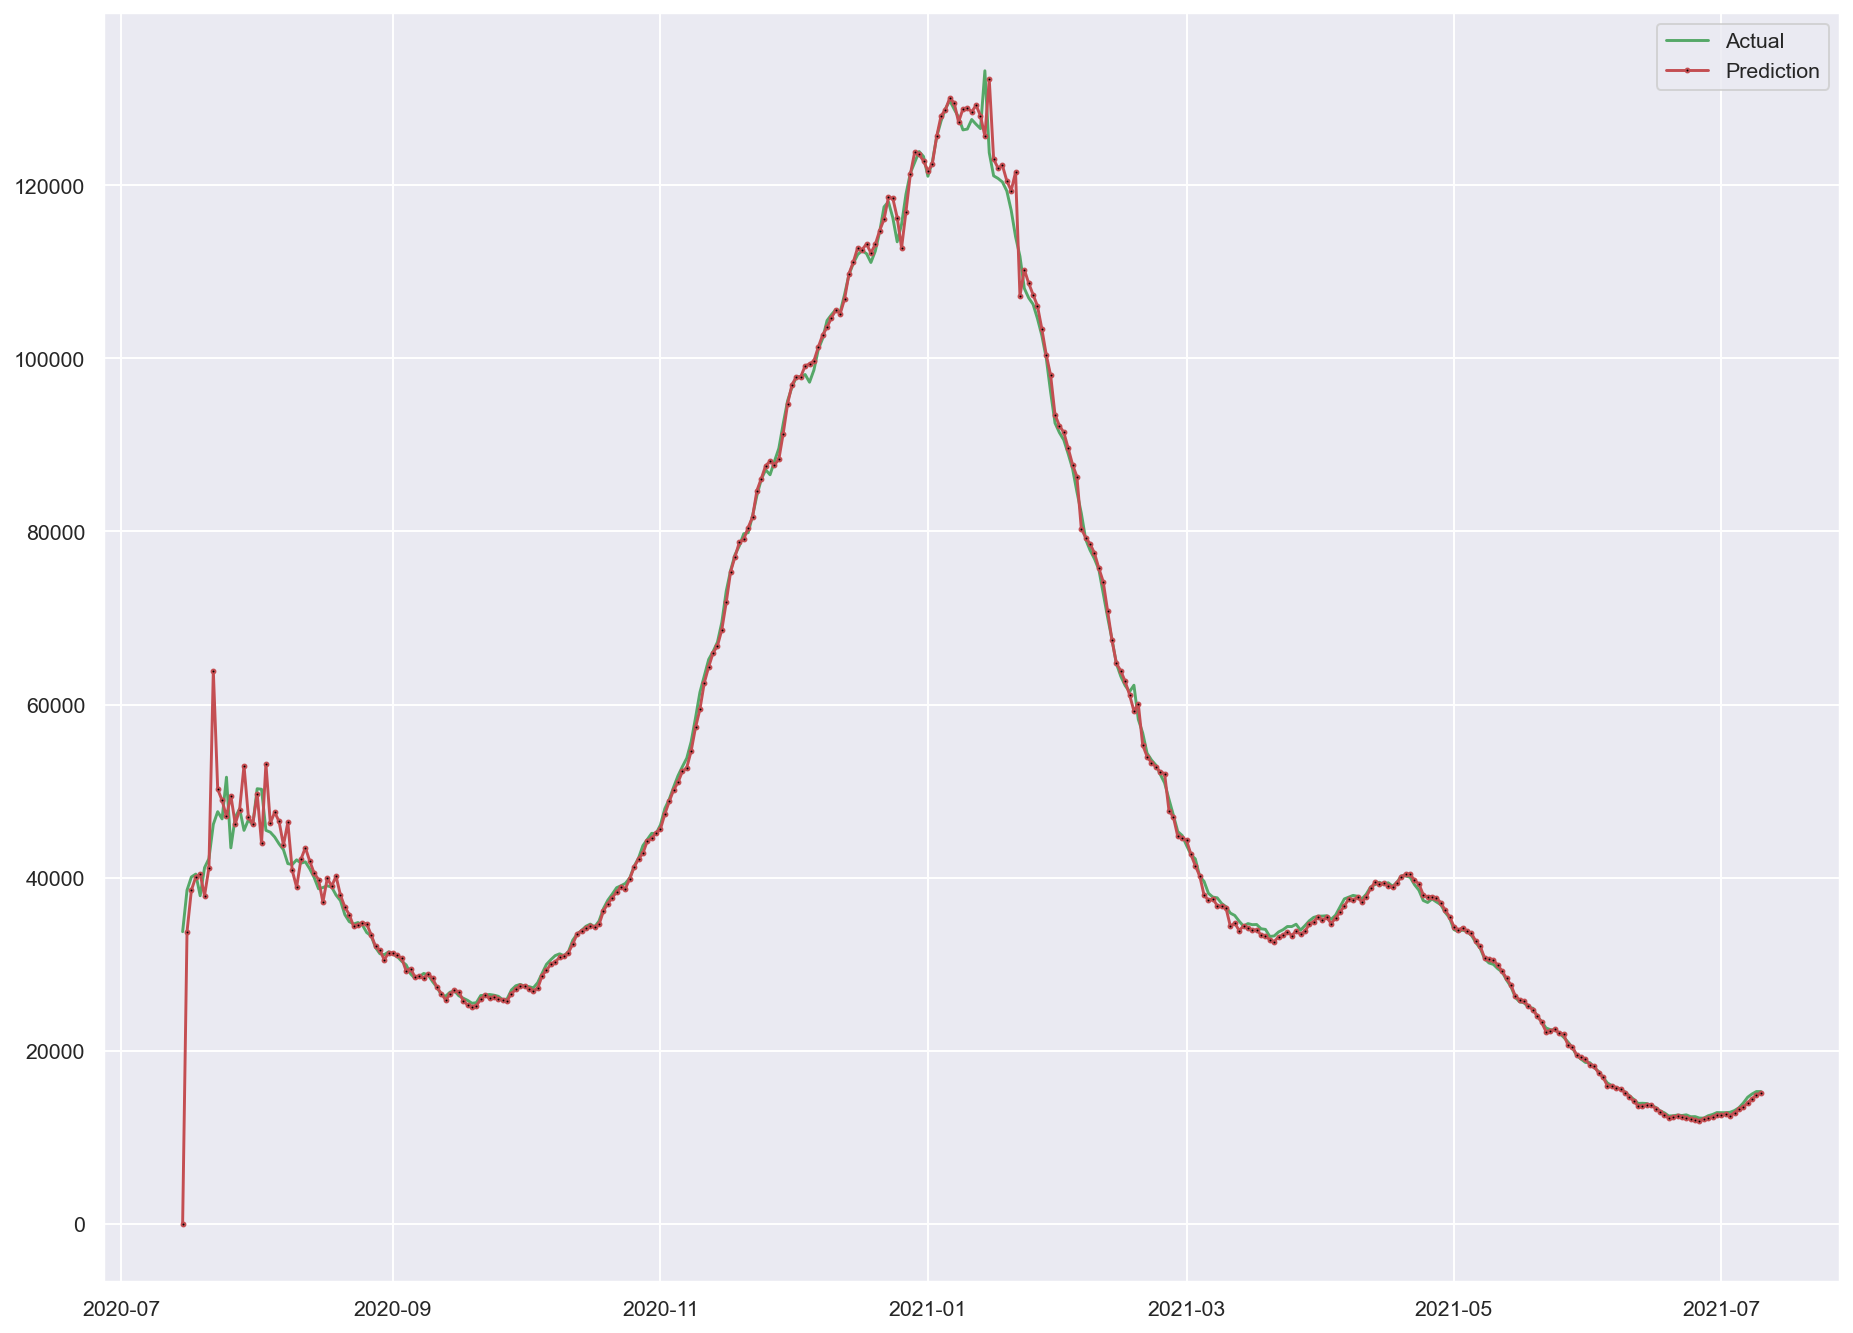

In [578]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
actual=test
predicted=Combine_df_USA['Prediction']
#x2 = df_USA_final['Day_7RW'].astype(float)
model=ARIMA(df_USA_final['Daily_Admits'],order=(0,1,0)).fit()
print(model.summary())
plt.plot(df_USA_final['Daily_Admits'], color='g', label="Actual")
plt.plot(prediction,'r',label="Prediction", marker='o', markerfacecolor='black', markersize=2)
plt.legend()

### Evaluating the performance of a machine learning model
##### A good fitting model is one where the difference between the actual and observed values or predicted values for the selected model is small and unbiased for train ,validation and test data sets.

<ipython-input-579-22a95b403258>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


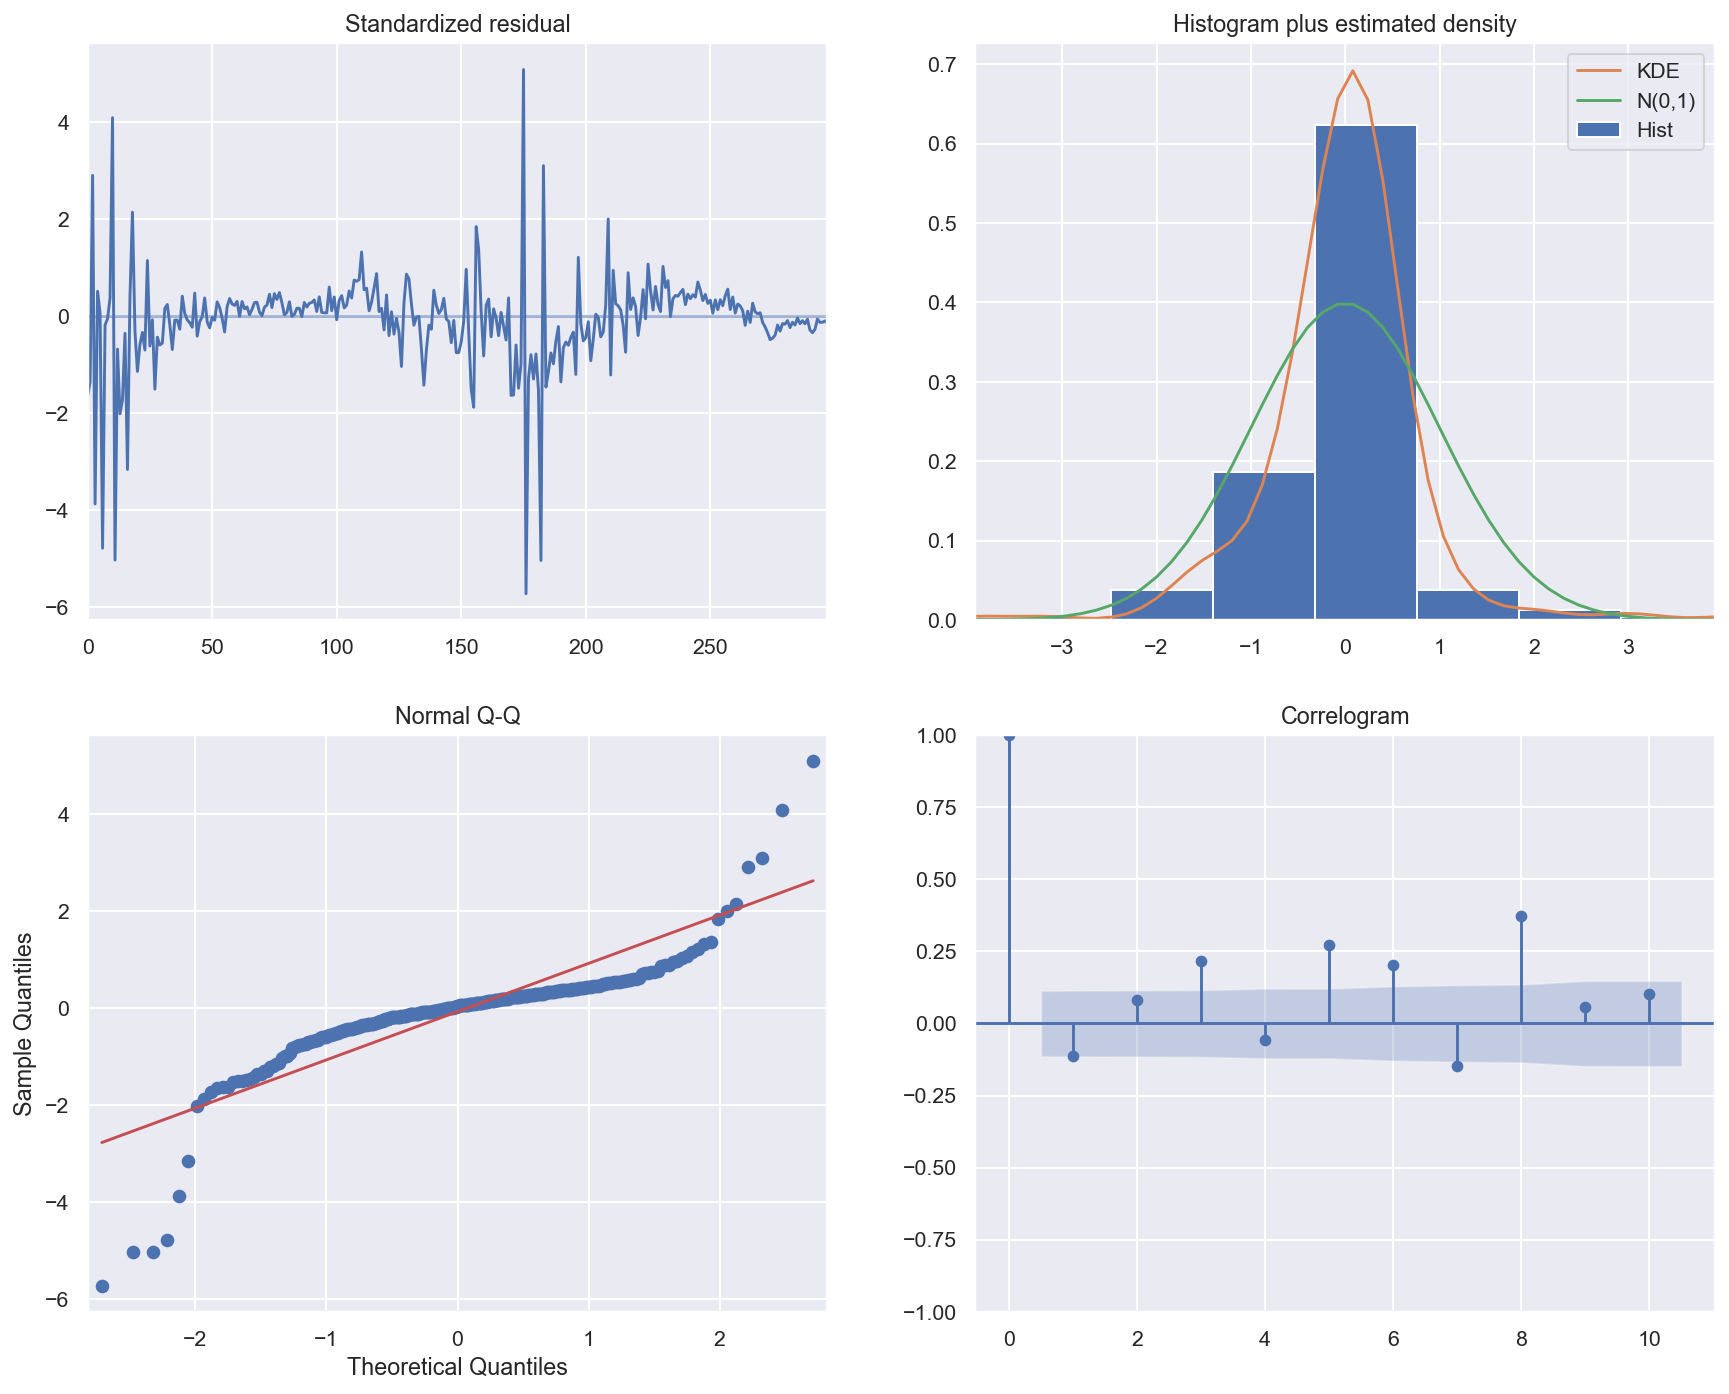

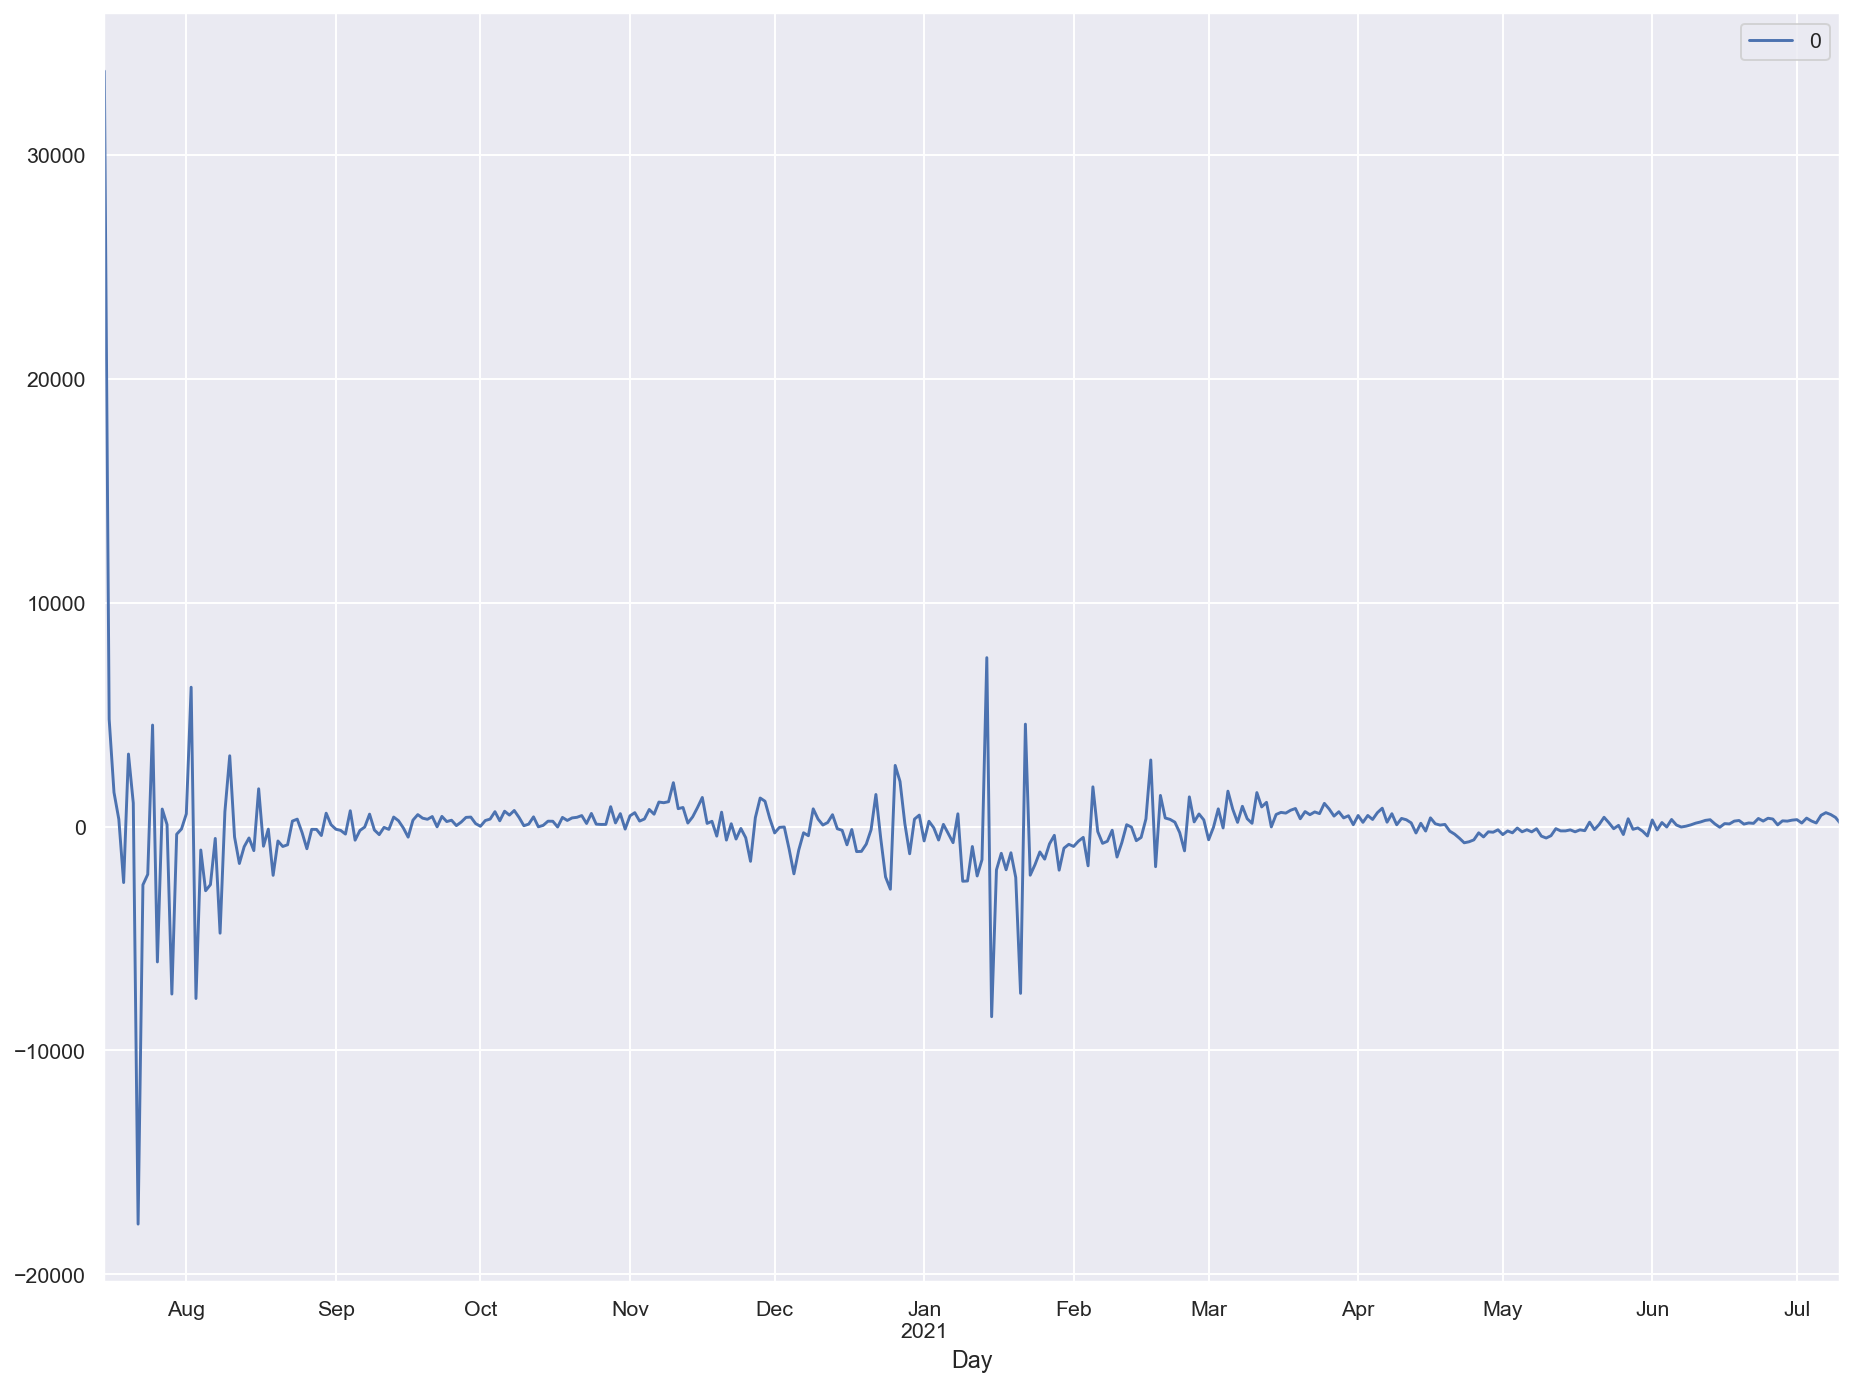

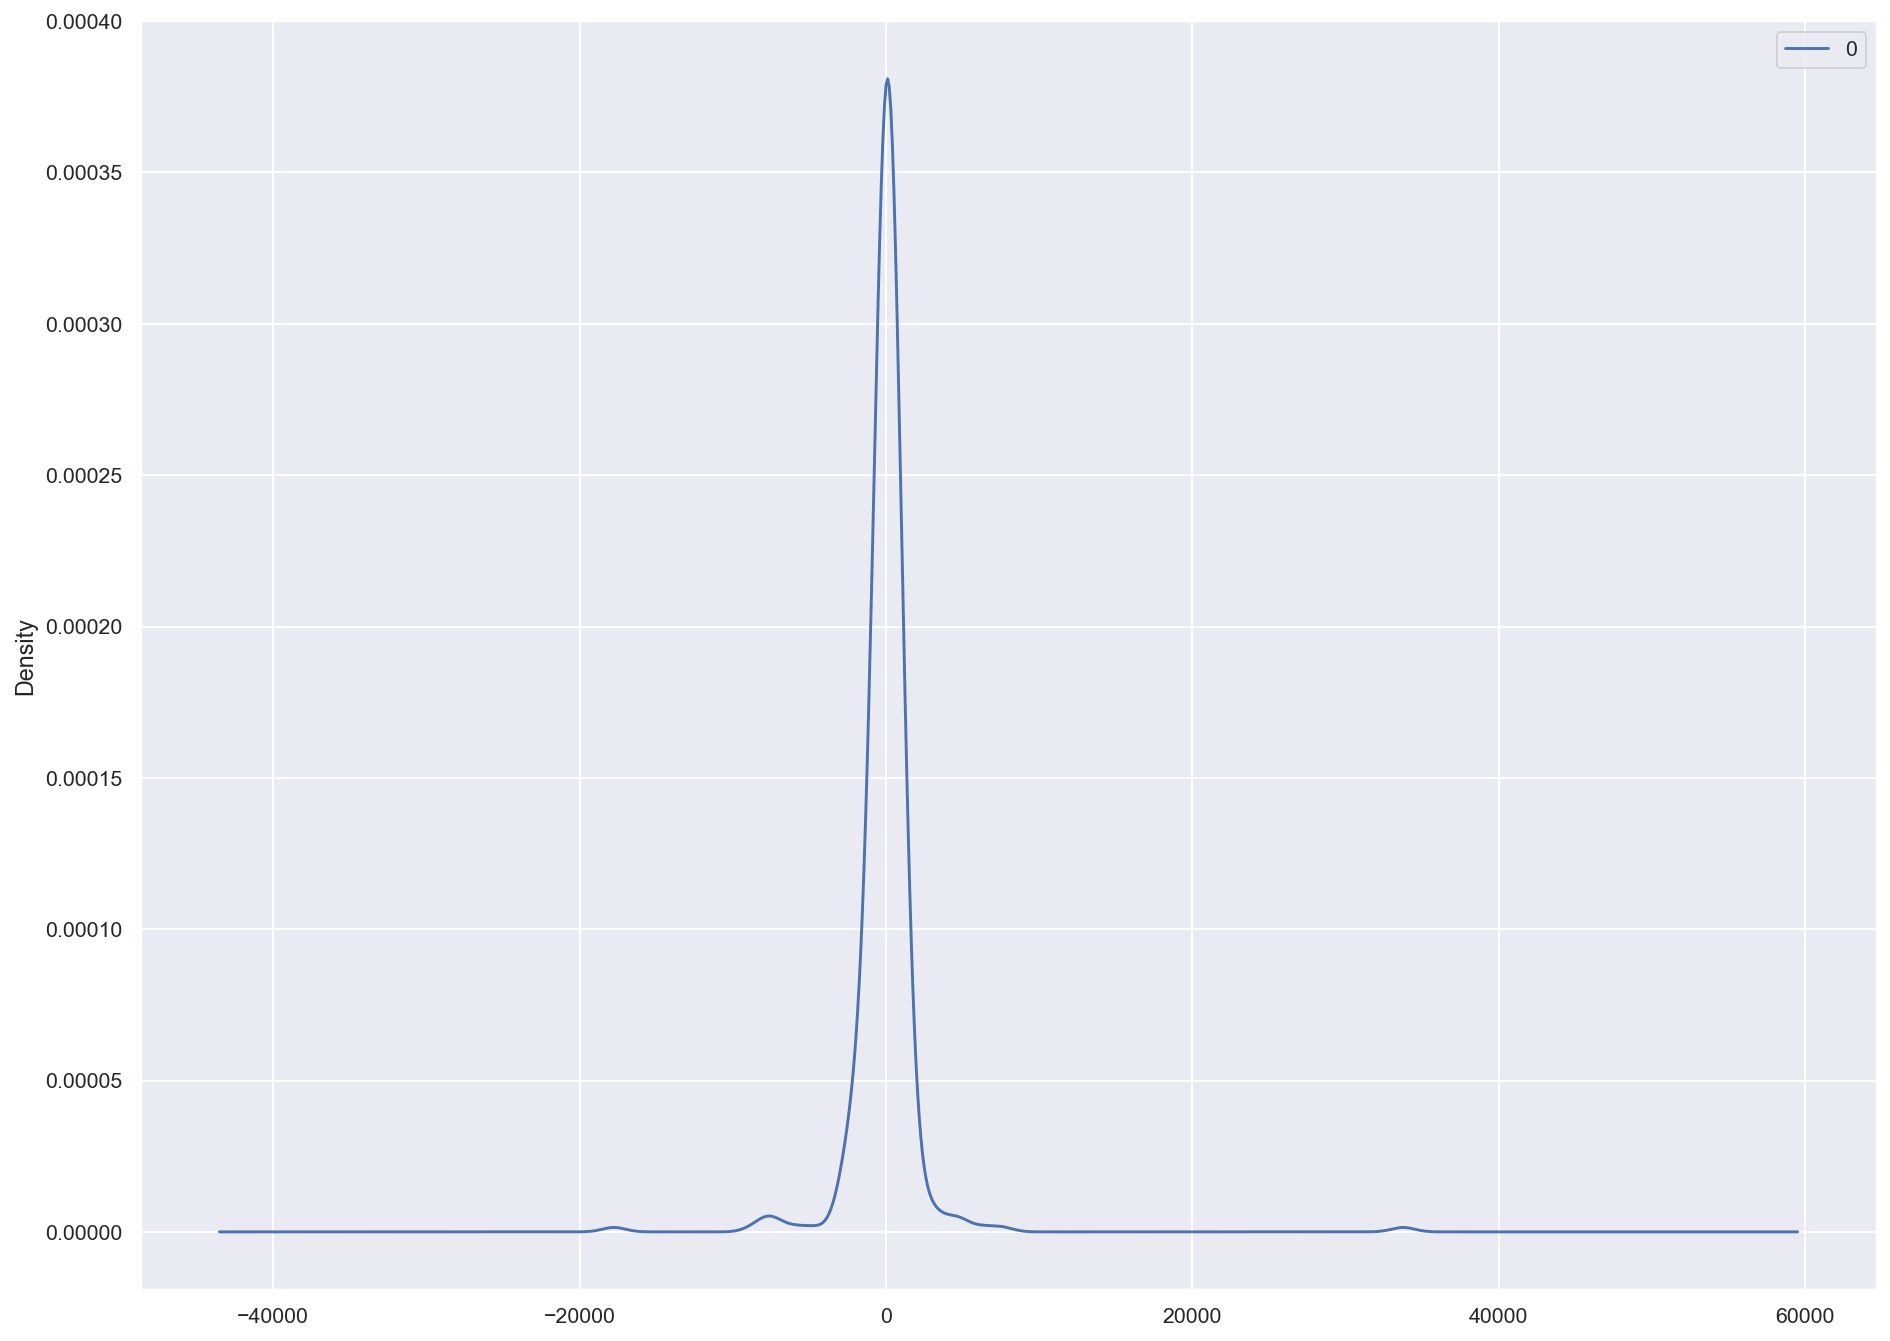

                  0
count    361.000000
mean      -3.529622
std     2455.865724
min   -17754.712375
25%     -357.263037
50%      100.782050
75%      412.642699
max    33753.000000


In [579]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
Arima_model.plot_diagnostics(figsize=(15,12))
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

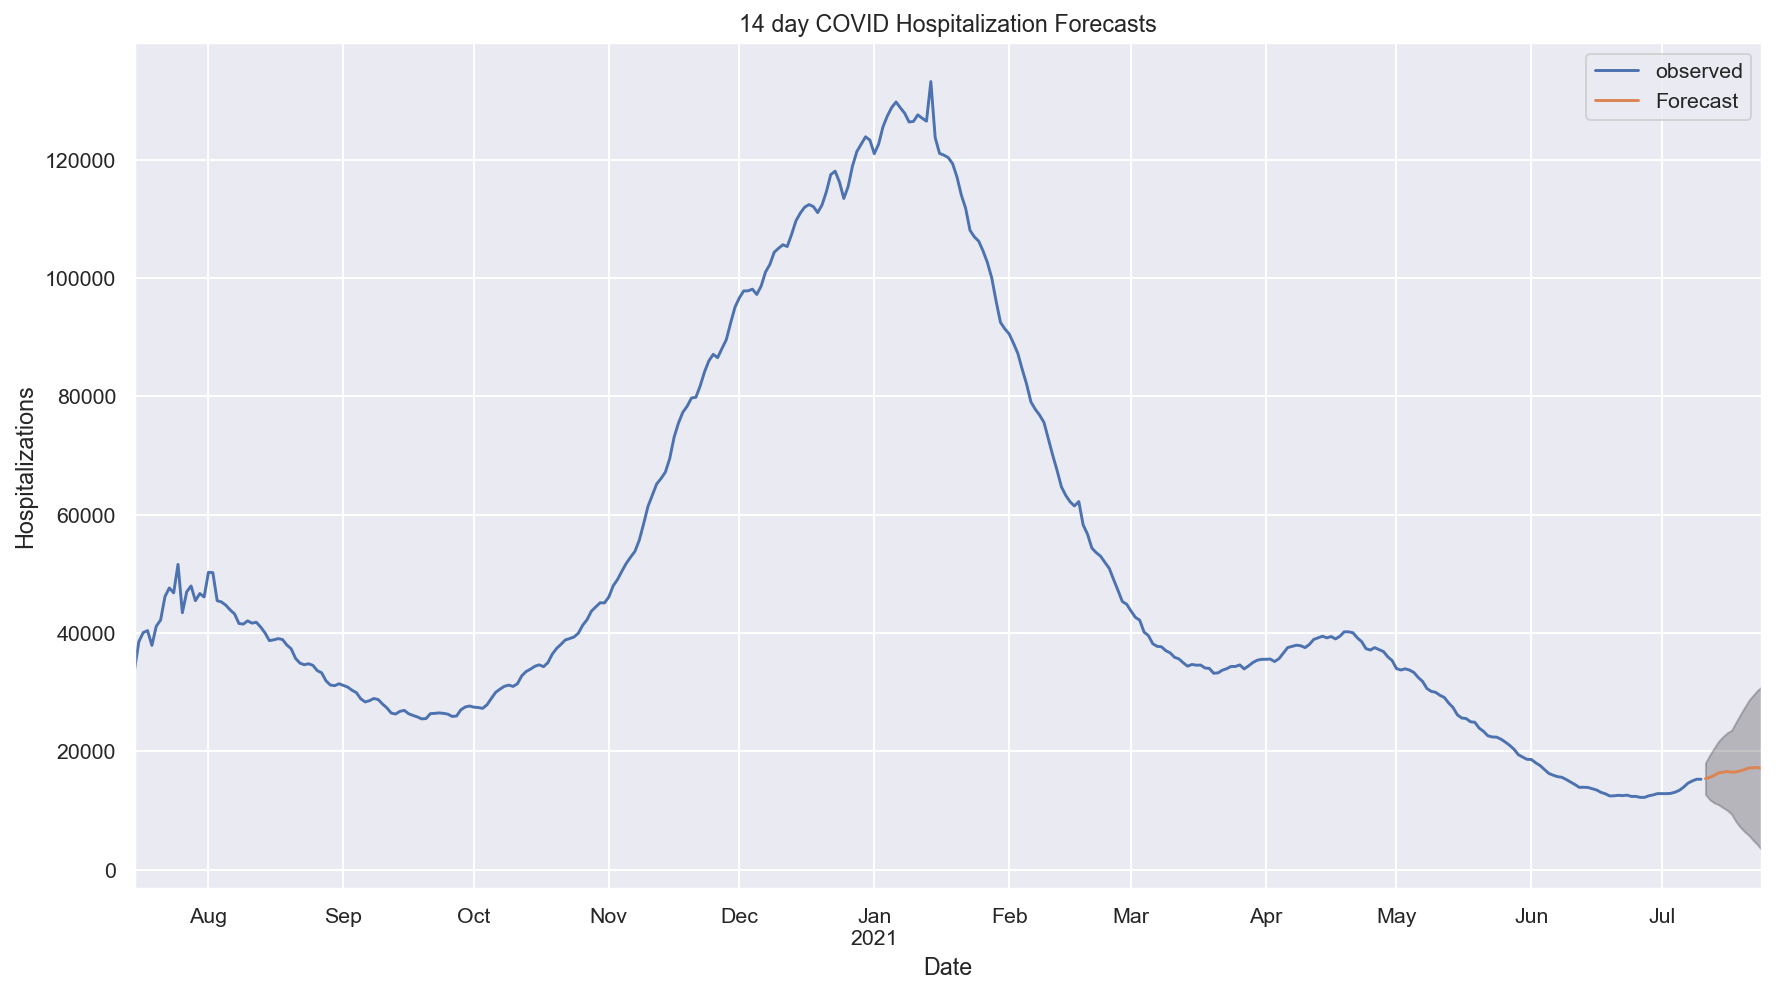

In [580]:
#Then, we’ll use the conf_inf() function to calculate the confidence intervals for each month. 
pred_uc = model_fit.get_forecast(14)
pred_ci = pred_uc.conf_int()
ax = df_USA_final['Daily_Admits'].plot(label='observed', figsize=(15, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Hospitalizations')
ax.set(title="14 day COVID Hospitalization Forecasts")
plt.legend()
plt.show()

In [581]:
#This creates a dataframe with upper and lower bounds.
round(pred_ci,0)

,lower Daily_Admits,upper Daily_Admits
2021-07-11,12710.0,18064.0
2021-07-12,11815.0,19387.0
2021-07-13,11293.0,20567.0
2021-07-14,10990.0,21698.0
2021-07-15,10493.0,22465.0
2021-07-16,10040.0,23155.0
2021-07-17,9385.0,23551.0
2021-07-18,8131.0,24903.0
2021-07-19,7185.0,26209.0
2021-07-20,6402.0,27439.0


In [582]:
round(pred_uc.predicted_mean,0)

2021-07-11    15387.0
2021-07-12    15601.0
2021-07-13    15930.0
2021-07-14    16344.0
2021-07-15    16479.0
2021-07-16    16597.0
2021-07-17    16468.0
2021-07-18    16517.0
2021-07-19    16697.0
2021-07-20    16921.0
2021-07-21    17206.0
2021-07-22    17229.0
2021-07-23    17262.0
2021-07-24    17103.0
Freq: D, dtype: float64

"*** ** **** **** **** **** **** ** *** *** **** **** ***** ******* ******** *** ******* ****** ******** *********
 "*** ** **** **** **** **** **** ** *** *** **** **** ***** ******* ******** *** ******* ****** ******** *********

## Validation
#### Actual COVID data from 7/10/21 to 7/24/21 is collected to check model accuracy

In [683]:
path=MYDIR+"/Downloads/current-covid-patients-hospital (1).csv"
df1=pd.read_csv(path)
df1

,Entity,Code,Day,Daily hospital occupancy
0,Austria,AUT,2020-04-01,856
1,Austria,AUT,2020-04-02,823
2,Austria,AUT,2020-04-03,829
3,Austria,AUT,2020-04-04,826
4,Austria,AUT,2020-04-05,712
...,...,...,...,...
13113,United States,USA,2021-07-20,25642
13114,United States,USA,2021-07-21,26888
13115,United States,USA,2021-07-22,28414
13116,United States,USA,2021-07-23,29607


In [684]:
#Filtering Data to highlight USA (.isin) information only, reset index and drop index and Entity column
df_reset1= df1[df1["Entity"].isin(["United States"])].reset_index().drop(['index', 'Entity'], axis=1)
#Rename Column Titles
df_rename1=df_reset1.rename({'Code':'Country','Daily hospital occupancy':'Daily_Admits'}, axis=1)
#Rearrange Column
df_USA1=df_rename1[['Day','Country','Daily_Admits']]
#Change Date to Dateformat
df_USA1['Day']=pd.to_datetime(df_USA1['Day'])
df_USA1.head()

,Day,Country,Daily_Admits
0,2020-07-15,USA,33757
1,2020-07-16,USA,38534
2,2020-07-17,USA,40060
3,2020-07-18,USA,40399
4,2020-07-19,USA,37899


In [676]:
df_validation=df_USA1.drop(['Country'],axis=1).set_index('Day')
df_validation.tail(14)

,Daily_Admits
Day,
2021-07-11,16373
2021-07-12,17305
2021-07-13,18170
2021-07-14,19053
2021-07-15,19883
2021-07-16,20847
2021-07-17,21560
2021-07-18,22529
2021-07-19,24209


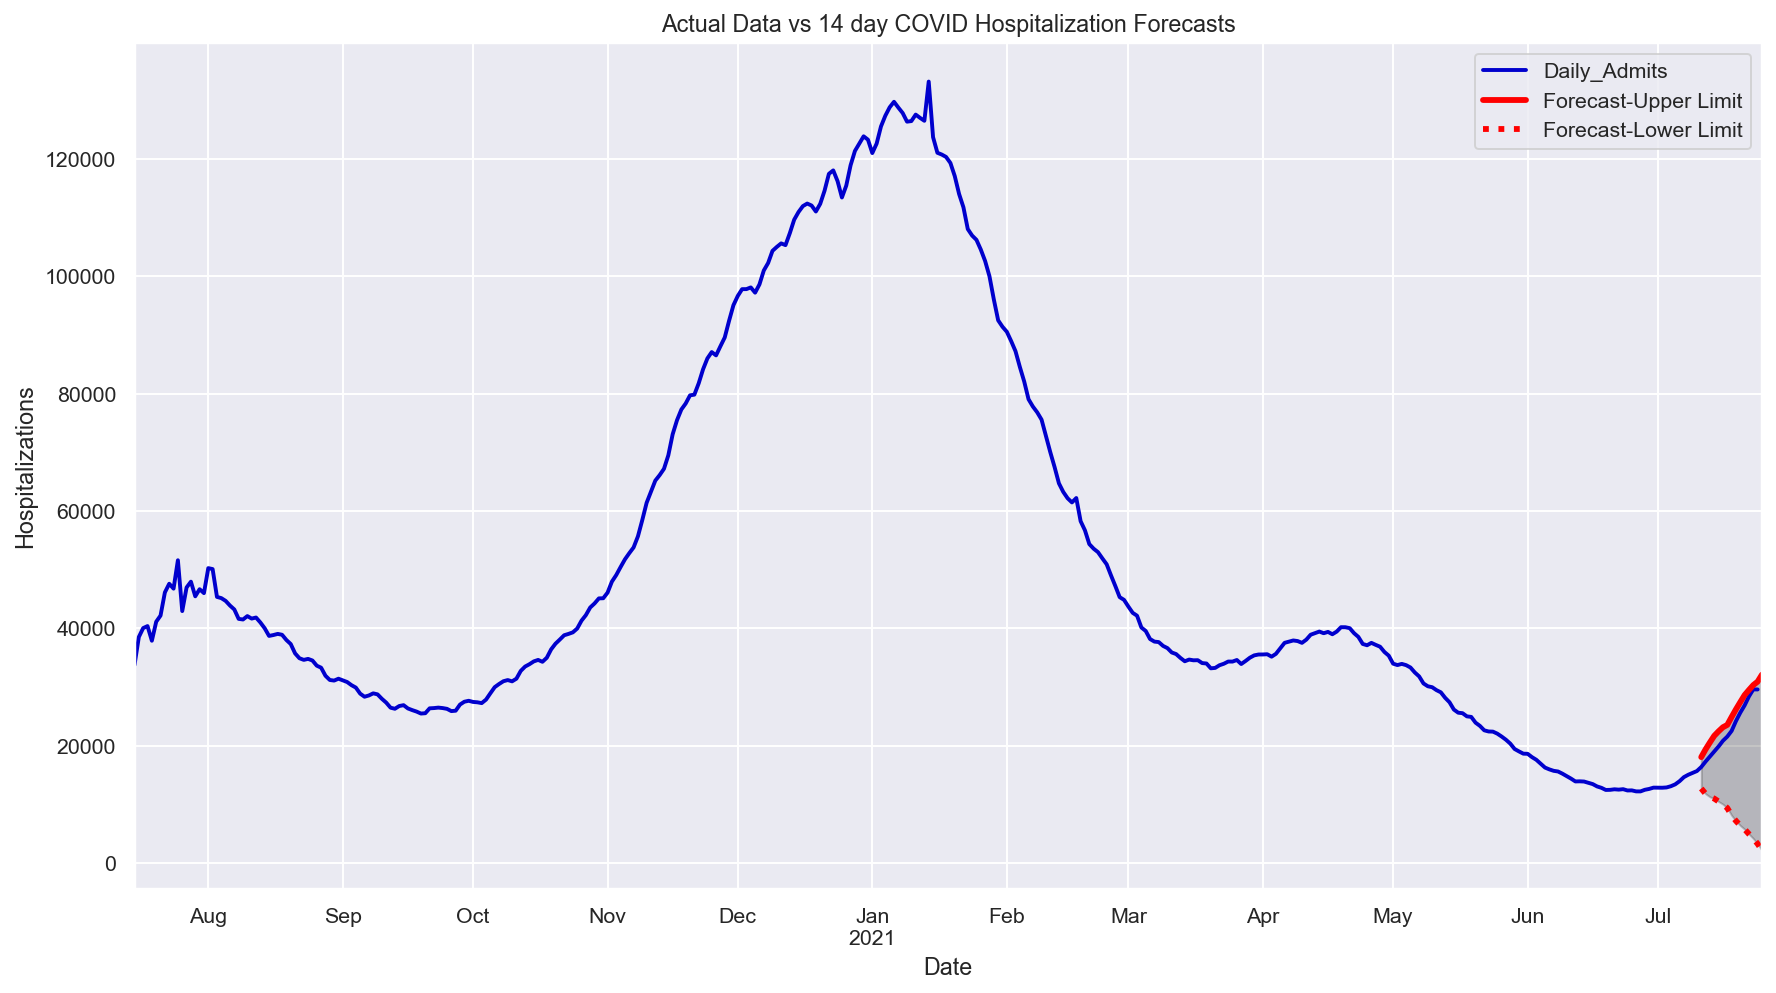

In [707]:
pred_uc = model_fit.get_forecast(15)
pred_ci = pred_uc.conf_int()
ax=df_validation.plot(label='Actual', figsize=(15, 8), color ='mediumblue', linewidth=2)
#pred_uc.predicted_mean.plot(label='Forecast-Mean', color ='red', linestyle='dashed', linewidth=3)
pred_ci['upper Daily_Admits'].plot(label='Forecast-Upper Limit', color ='red', linewidth=3)
pred_ci['lower Daily_Admits'].plot(label='Forecast-Lower Limit', linestyle='dotted', color ='red', linewidth=3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Hospitalizations')
ax.set(title="Actual Data vs 14 day COVID Hospitalization Forecasts")
plt.legend()
plt.show()

### Upper limit of the predicted value closely matches the actual covid hospitalization data. 

## II. Facebook Prophet

In [687]:
df_USA.head()

,Day,Country,Daily_Admits,Month,Day_7RW
0,2020-07-15,USA,33753,July,NaN
1,2020-07-16,USA,38549,July,NaN
2,2020-07-17,USA,40078,July,NaN
3,2020-07-18,USA,40409,July,NaN
4,2020-07-19,USA,37910,July,NaN


In [688]:
# Removing Country, Daily_Admits, Months columns
df_fbp=df_USA.drop(['Country', 'Day_7RW', 'Month'], axis=1)

#### Data Preprocessing i.e., taking only two columns which is the date column and the target column, and ignoring the others. Also, converting the date column to Date Time format and then renaming both the columns to “ds” for date and “y” for the target. You can also use feature scaling like normalization or standardization for fast execution of code and better predictions.

#### ds (datestamp) must be of type date or datetime.
#### y is a numeric value we want to predict.

In [689]:
df_fbp.columns = ['ds', 'y']
df_fbp.tail()

,ds,y
356,2021-07-06,13956
357,2021-07-07,14632
358,2021-07-08,15006
359,2021-07-09,15290
360,2021-07-10,15286


<function matplotlib.pyplot.show(close=None, block=None)>

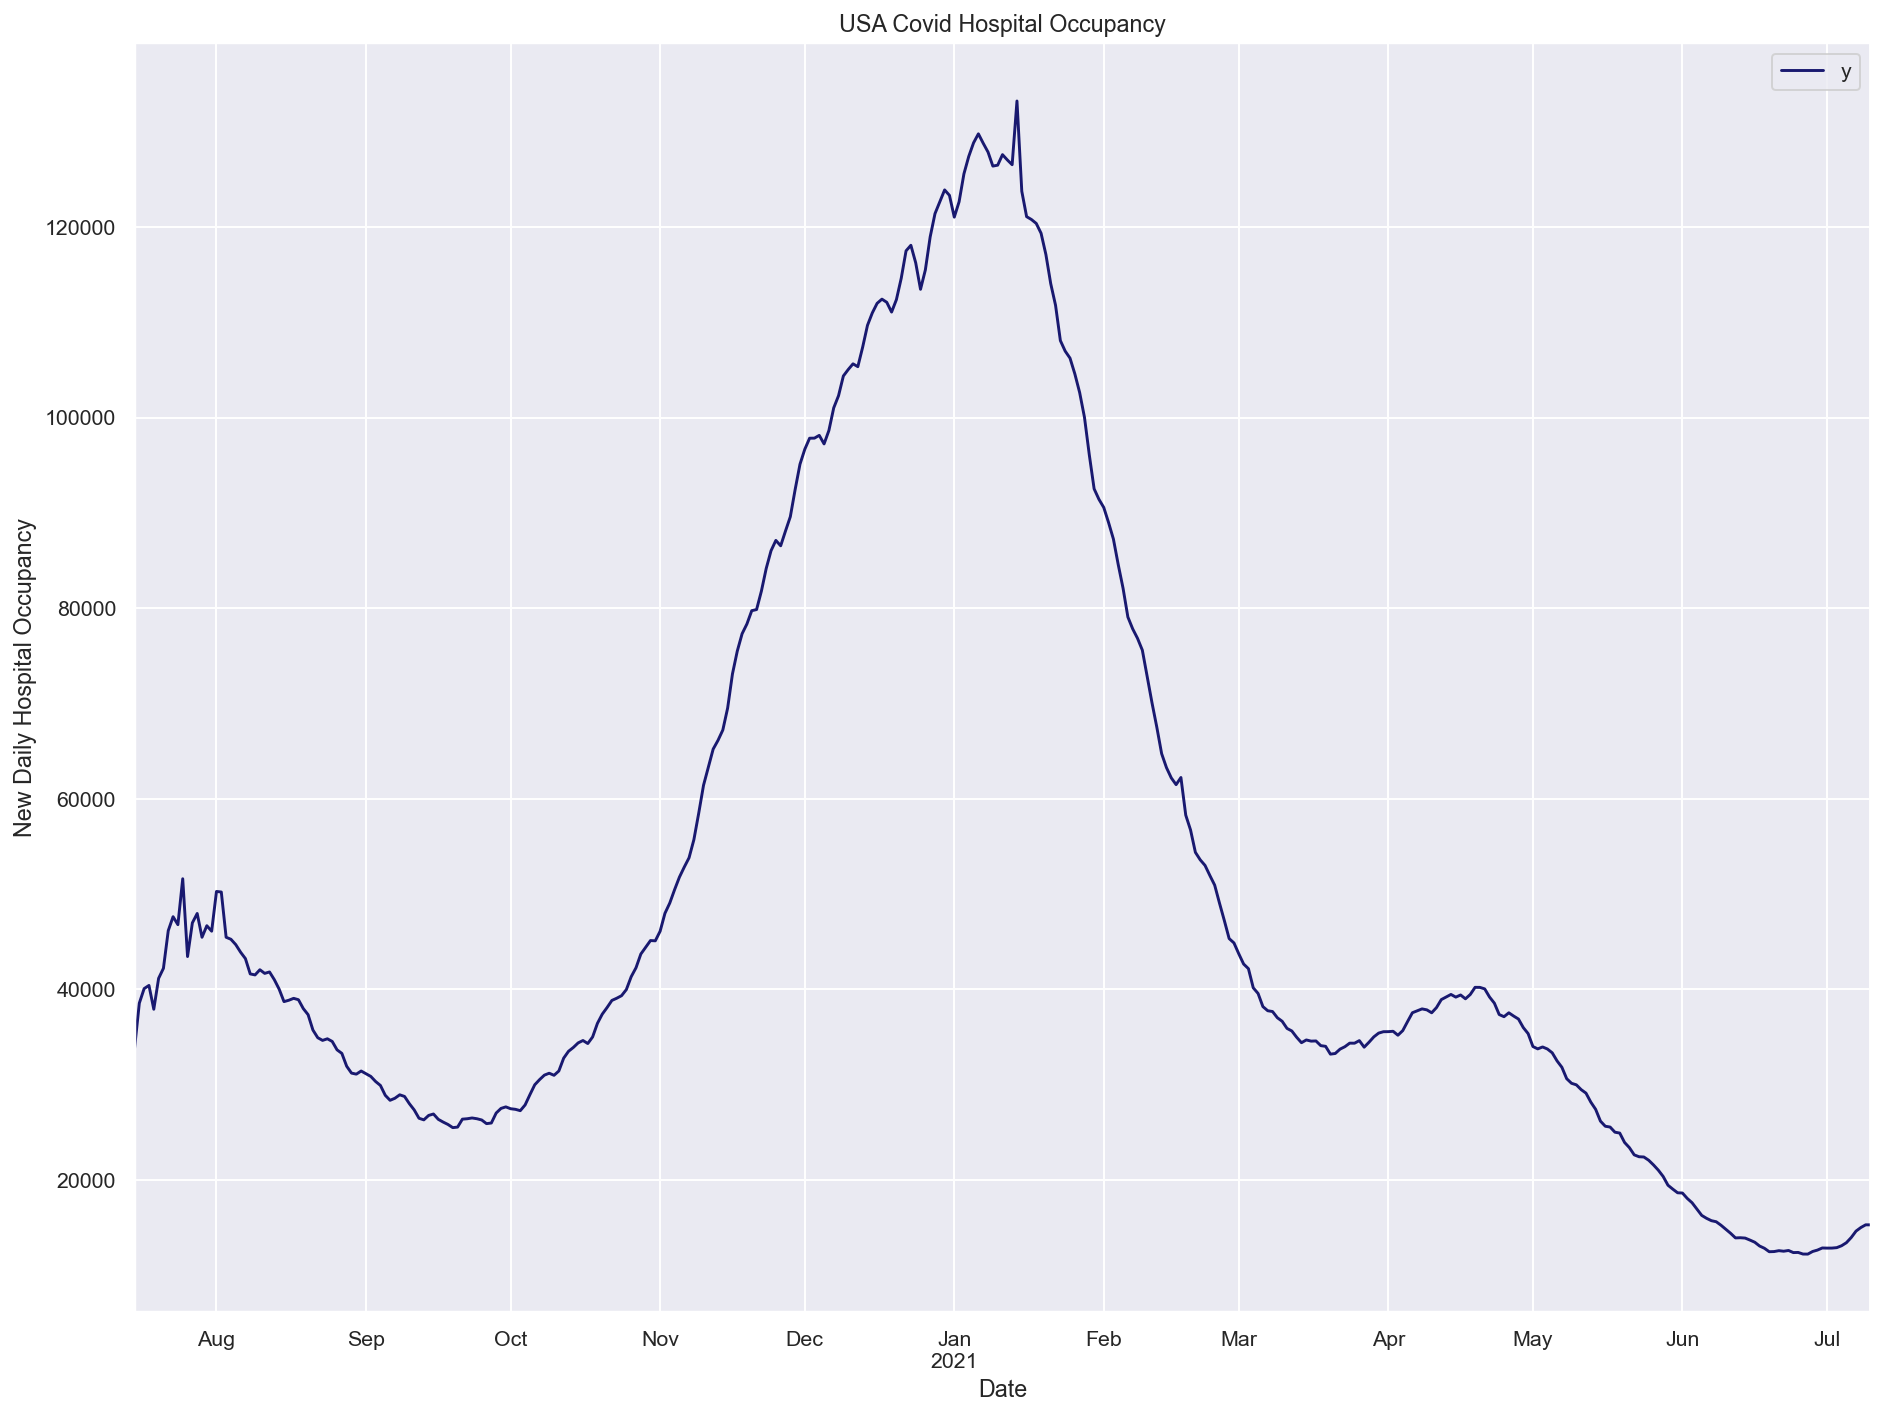

In [690]:
#Line Plot
df_fbp.plot(kind='line', x='ds', y='y', color='midnightblue')
plt.title('USA Covid Hospital Occupancy')
plt.ylabel('New Daily Hospital Occupancy')
plt.xlabel('Date')
plt.show

In [691]:
df_fbp.dtypes

ds    datetime64[ns]
y              int64
dtype: object

#### Fitting/Training the whole model under the Prophet library - Importing Fbprophet for time series forecasting and training the model. Hereunder, we can see that the mechanism is the same as of any machine learning algorithm that is, fitting the model and then predicting the output. The only difference that is there is, we need to provide our whole dataset in the model training part and should not split the same into train and test.

In [692]:
from fbprophet import Prophet
m=Prophet()
m.fit(df_fbp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Creating the future dataset with the help of the Prophet so that we make predictions on unseen data:

#### The authors of the library generally advise to make predictions based on at least several months, ideally, more than a year of historical data. Luckily, in our case we have more than a couple of years of data to fit the model.

##### To measure the quality of our forecast, we need to split our dataset into the historical part, which is the first and biggest slice of our data, and the prediction part, which will be located at the end of the timeline. We will remove the last month from the dataset in order to use it later as a prediction target:

##### Now we need to create a new Prophet object. Here we can pass the parameters of the model into the constructor. But in this article we will use the defaults. Then we train our model by invoking its fit method on our training dataset:

##### Using the helper method Prophet.make_future_dataframe, we create a dataframe which will contain all dates from the history and also extend into the future for those 14 days that we left out before.

In [693]:
prediction_size=14
#creating future dates for prediction into a dataframe
future=m.make_future_dataframe(periods=prediction_size)
future.tail()

,ds
370,2021-07-20
371,2021-07-21
372,2021-07-22
373,2021-07-23
374,2021-07-24


### Making predictions:

In [694]:
pred=m.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-15,44543.948145,42084.852098,47877.943982,44543.948145,44543.948145,494.465208,494.465208,494.465208,494.465208,494.465208,494.465208,0.0,0.0,0.0,45038.413353
1,2020-07-16,44483.186236,41882.357634,47622.499171,44483.186236,44483.186236,340.209668,340.209668,340.209668,340.209668,340.209668,340.209668,0.0,0.0,0.0,44823.395903
2,2020-07-17,44422.424327,41501.173776,47096.642129,44422.424327,44422.424327,-252.392772,-252.392772,-252.392772,-252.392772,-252.392772,-252.392772,0.0,0.0,0.0,44170.031555
3,2020-07-18,44361.662418,40872.145703,46694.027137,44361.662418,44361.662418,-663.313292,-663.313292,-663.313292,-663.313292,-663.313292,-663.313292,0.0,0.0,0.0,43698.349125
4,2020-07-19,44300.900509,40581.120401,46490.324807,44300.900509,44300.900509,-641.694281,-641.694281,-641.694281,-641.694281,-641.694281,-641.694281,0.0,0.0,0.0,43659.206227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-07-20,4035.807695,994.167267,8513.460562,2715.951417,5548.950995,556.004905,556.004905,556.004905,556.004905,556.004905,556.004905,0.0,0.0,0.0,4591.812601
371,2021-07-21,3681.234434,770.030646,7858.161565,2024.832871,5485.646633,494.465208,494.465208,494.465208,494.465208,494.465208,494.465208,0.0,0.0,0.0,4175.699642
372,2021-07-22,3326.661173,-444.534288,7385.957739,1434.971829,5456.357476,340.209668,340.209668,340.209668,340.209668,340.209668,340.209668,0.0,0.0,0.0,3666.870841
373,2021-07-23,2972.087912,-1141.187465,6857.932135,693.893721,5525.277578,-252.392772,-252.392772,-252.392772,-252.392772,-252.392772,-252.392772,0.0,0.0,0.0,2719.695140


#### Hereunder the predictions table, we are only concerned with ds, yhat_lower, yhat_upper, and yhat because these are the variables that will give us the predicted results with respect to the date specified.yhat means the predicted output based on the input fed to the model, yhat_lower, and upper means the upper and lower value that can go based on the predicted output that is, the fluctuations that can happen. Getting the desired columns:

In [695]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-15,45038.413353,42084.852098,47877.943982
1,2020-07-16,44823.395903,41882.357634,47622.499171
2,2020-07-17,44170.031555,41501.173776,47096.642129
3,2020-07-18,43698.349125,40872.145703,46694.027137
4,2020-07-19,43659.206227,40581.120401,46490.324807


### Plotting the output: 
#### Hereunder the plot we can see the predictions made by the Prophet library. The dotted lines represent the actual data points that we specified in the training part. The lines represent the predictions made. Also, we can see the predictions made on the unseen data that we created with only lines at the extreme right-hand side. For verification purposes, you can match the data frame timestamps with the graph.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 2520x840 with 0 Axes>

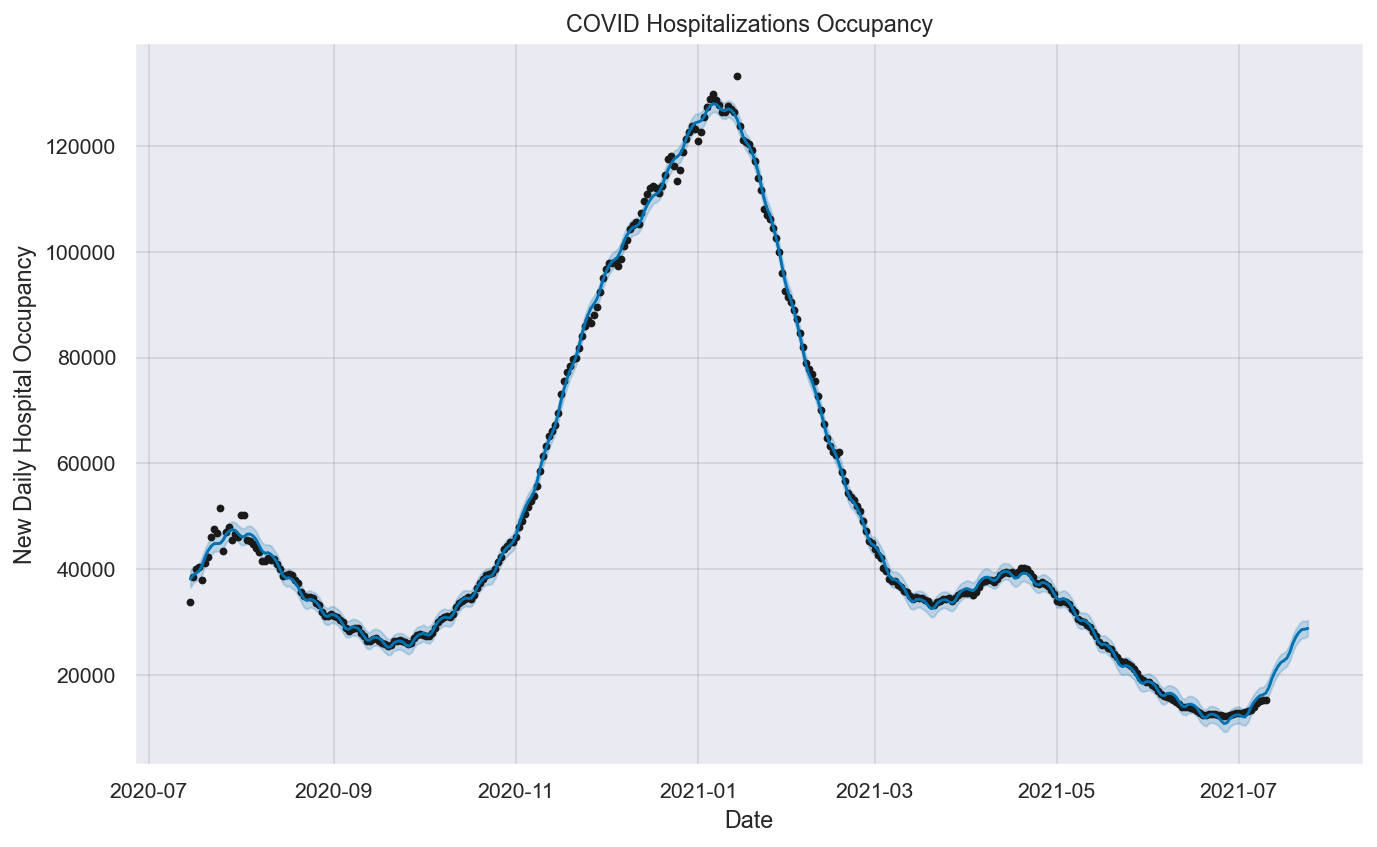

In [696]:
###daily_seasonality

from fbprophet import Prophet


newadmits_model = Prophet(interval_width=0.85, yearly_seasonality=True)
newadmits_model.fit(df_fbp)


newadmits_forecast = newadmits_model.make_future_dataframe(periods=prediction_size, freq='D')
newadmits_forecast = newadmits_model.predict(newadmits_forecast)

plt.figure(figsize=(18, 6))
newadmits_model.plot(newadmits_forecast, xlabel = 'Date', ylabel = 'New Daily Hospital Occupancy')
plt.title('COVID Hospitalizations Occupancy');

In [700]:
df_reset1.head()
df_reset1['Day']=pd.to_datetime(df_reset1['Day'])

In [701]:
df_validation1=df_reset1.drop(['Code'],axis=1).set_index('Day')
df_validation1.head()

,Daily hospital occupancy
Day,
2020-07-15,33757
2020-07-16,38534
2020-07-17,40060
2020-07-18,40399
2020-07-19,37899


## Validation 
#### Actual COVID data from 7/10/21 to 7/24/21 is collected to check model accuracy

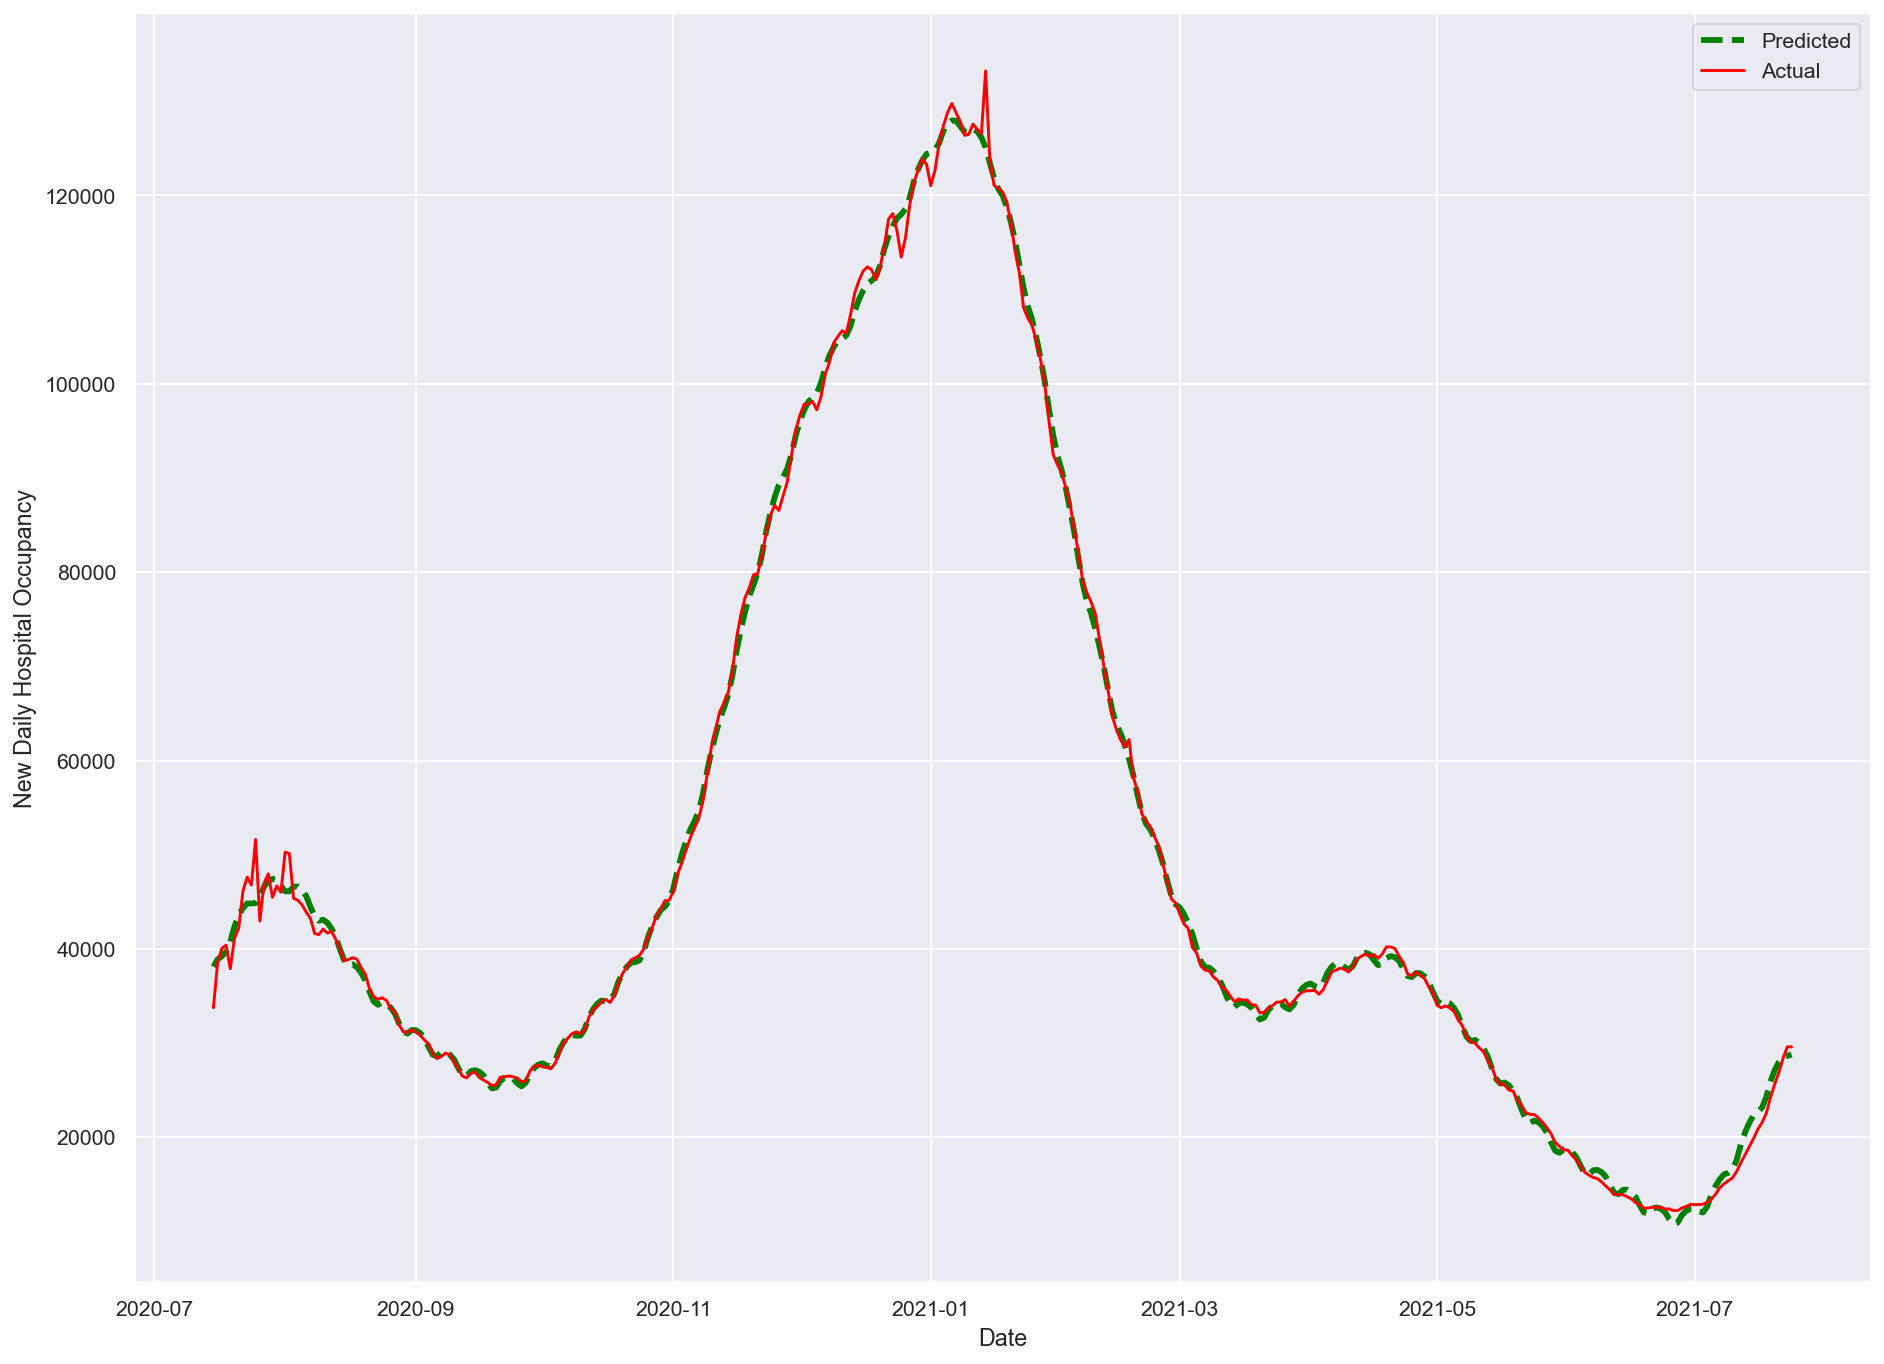

In [705]:
x4=newadmits_forecast['ds']
y4=newadmits_forecast['yhat']
plt.plot(x4,y4, label='Predicted', color ='green', linestyle='dashed', linewidth=3)
plt.plot(df_validation1, label='Actual', color ='red')
plt.xlabel('Date')
plt.ylabel('New Daily Hospital Occupancy')
plt.legend()

## Facebook prophet prediction matches closely. 

In [605]:
newadmits_forecast = newadmits_model.predict(newadmits_forecast)
newadmits_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-15,58312.162707,36615.760251,39721.669528,58312.162707,58312.162707,-20194.738278,-20194.738278,-20194.738278,557.843885,557.843885,557.843885,-20752.582163,-20752.582163,-20752.582163,0.0,0.0,0.0,38117.424429
1,2020-07-16,58274.939987,37331.357027,40421.070270,58274.939987,58274.939987,-19386.504529,-19386.504529,-19386.504529,353.433891,353.433891,353.433891,-19739.938420,-19739.938420,-19739.938420,0.0,0.0,0.0,38888.435457
2,2020-07-17,58237.717267,37657.943004,40587.182040,58237.717267,58237.717267,-19007.729558,-19007.729558,-19007.729558,-267.973532,-267.973532,-267.973532,-18739.756025,-18739.756025,-18739.756025,0.0,0.0,0.0,39229.987709
3,2020-07-18,58200.494547,38092.280404,41338.081078,58200.494547,58200.494547,-18513.019636,-18513.019636,-18513.019636,-750.911228,-750.911228,-750.911228,-17762.108408,-17762.108408,-17762.108408,0.0,0.0,0.0,39687.474911
4,2020-07-19,58163.271827,39267.509556,42346.073094,58163.271827,58163.271827,-17392.630030,-17392.630030,-17392.630030,-575.738978,-575.738978,-575.738978,-16816.891053,-16816.891053,-16816.891053,0.0,0.0,0.0,40770.641796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-07-20,42750.965370,25612.072517,28721.447197,42748.776393,42752.779289,-15624.343471,-15624.343471,-15624.343471,510.683616,510.683616,510.683616,-16135.027087,-16135.027087,-16135.027087,0.0,0.0,0.0,27126.621899
371,2021-07-21,42706.038457,26482.074070,29659.143024,42703.416649,42708.303408,-14711.426759,-14711.426759,-14711.426759,557.843885,557.843885,557.843885,-15269.270643,-15269.270643,-15269.270643,0.0,0.0,0.0,27994.611698
372,2021-07-22,42661.111544,27069.207699,30128.525895,42657.806448,42663.724833,-14107.522276,-14107.522276,-14107.522276,353.433891,353.433891,353.433891,-14460.956167,-14460.956167,-14460.956167,0.0,0.0,0.0,28553.589267
373,2021-07-23,42616.184631,27033.235451,30180.282438,42612.461560,42619.281368,-13985.917822,-13985.917822,-13985.917822,-267.973532,-267.973532,-267.973532,-13717.944290,-13717.944290,-13717.944290,0.0,0.0,0.0,28630.266808


##### Prophet.plot_components allows us to observe different components of the model separately: trend, yearly and weekly seasonality. In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.

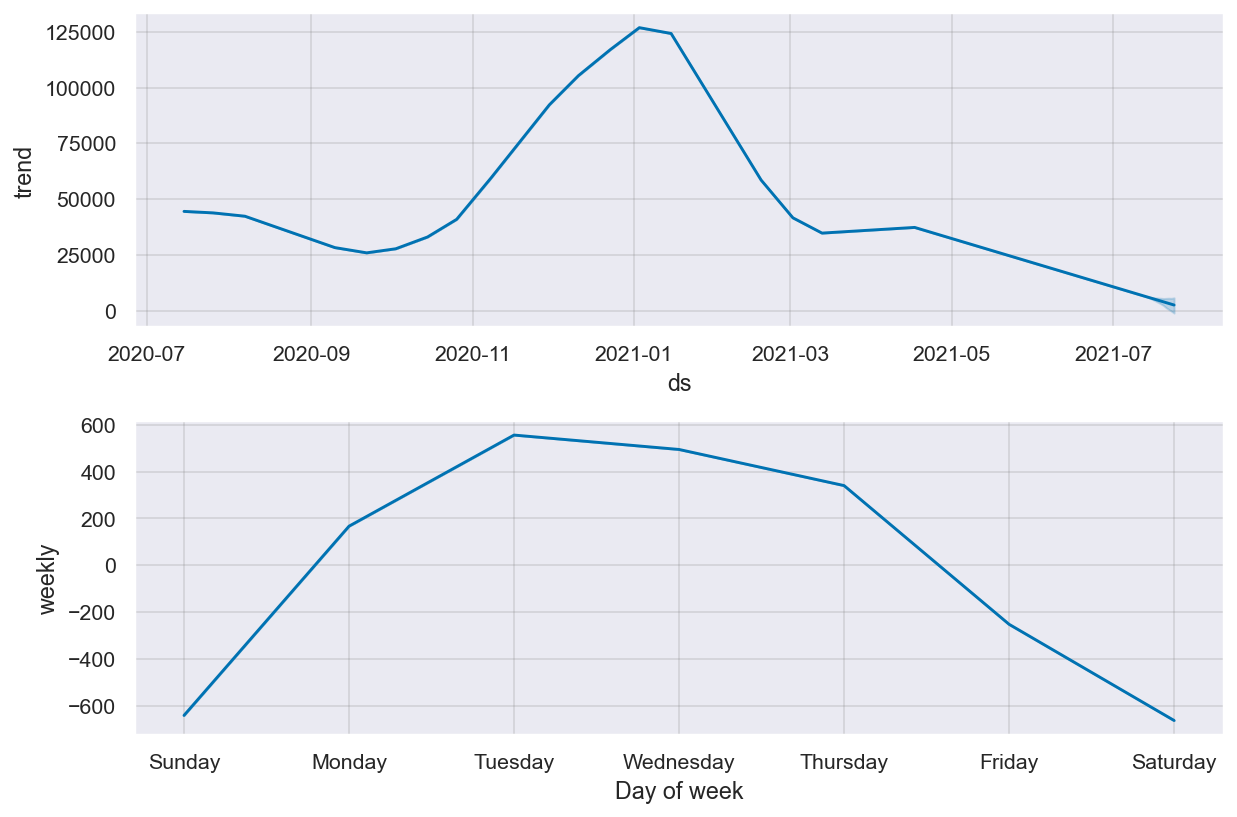

In [606]:
#Visualize Each Components[Trends,Weekly]
m.plot_components(pred);

## Cross Validation
## For measuring forecast errors by comparing the predicted values with the actual values. 

In [607]:
from fbprophet.diagnostics import cross_validation

In [608]:
cv=cross_validation(m, initial='90 days', period='7 days',horizon='14 days')

INFO:fbprophet:Making 37 forecasts with cutoffs between 2020-10-17 00:00:00 and 2021-06-26 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

In [609]:
#how far in the future the prediction was is the cutoff
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-10-18,33494.763179,31845.286930,35134.598641,35003,2020-10-17
1,2020-10-19,34530.273081,32923.472933,36242.750248,36430,2020-10-17
2,2020-10-20,35274.041837,33654.744434,36947.871048,37397,2020-10-17
3,2020-10-21,35334.241124,33609.550338,36960.011114,38090,2020-10-17
4,2020-10-22,36000.853478,34254.951511,37568.029302,38836,2020-10-17


## Performance Metrics

In [610]:
from fbprophet.diagnostics import performance_metrics

In [611]:
df_fbp_pm=performance_metrics(cv)
df_fbp_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,1.049236e+08,10243.220889,7824.572133,0.188014,0.127190,0.181770
1,3 days,1.214493e+08,11020.405938,8417.089915,0.200963,0.132792,0.189189
2,4 days,1.403546e+08,11847.134050,9044.281471,0.216007,0.146938,0.169581
3,5 days,1.641262e+08,12811.173583,9728.739109,0.233418,0.154448,0.142554
4,6 days,1.954127e+08,13979.010334,10800.832316,0.255244,0.215273,0.115527
5,7 days,2.282814e+08,15108.983479,11728.853512,0.276710,0.272066,0.108108
6,8 days,2.615533e+08,16172.608717,12581.268814,0.297796,0.138317,0.088500
7,9 days,2.932805e+08,17125.433528,13385.483194,0.315377,0.277691,0.081081
8,10 days,3.255774e+08,18043.762906,14155.171414,0.331857,0.331271,0.081081
9,11 days,3.601483e+08,18977.574739,14941.989284,0.349666,0.337660,0.081081


## Visualizing Performance Metrics

In [612]:
from fbprophet.plot import plot_cross_validation_metric

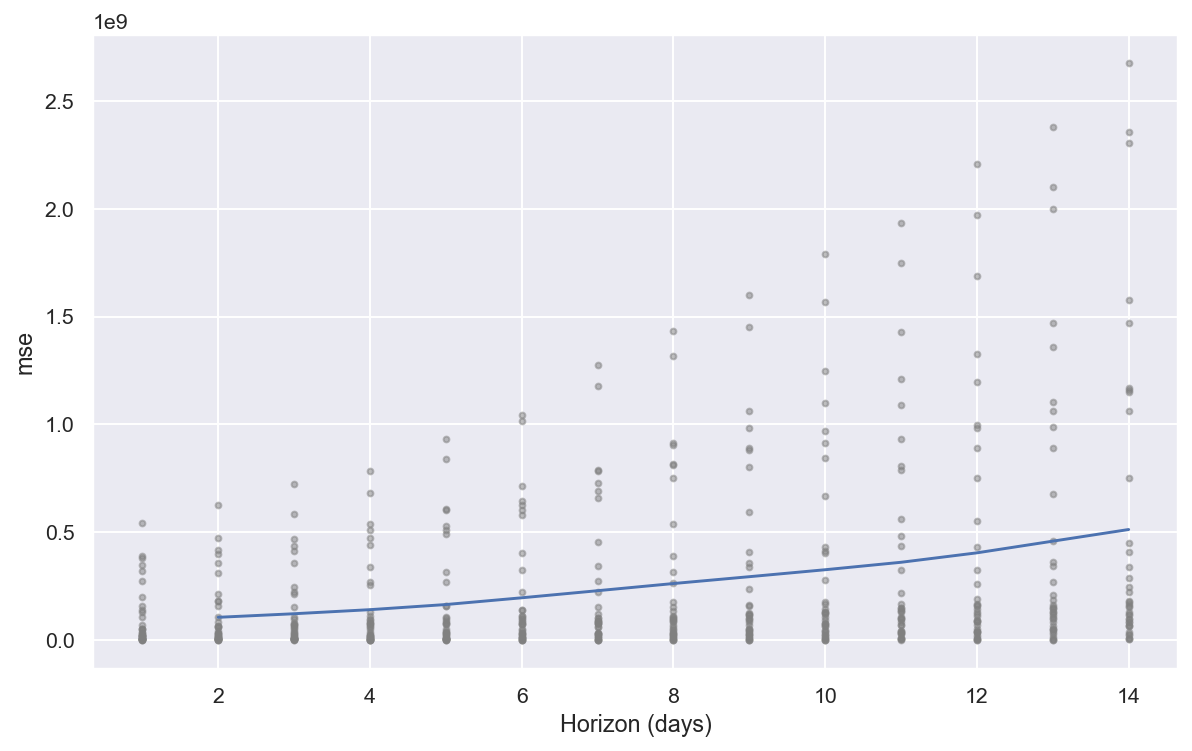

In [613]:
plot_cross_validation_metric(cv,metric='mse');